Name: Tushar Muley

Assignment: Project 1 - Human and Economic Cost of Hurricanes

Date: Jan 9, 2022

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math
import statsmodels.api as sm
from statsmodels.formula.api import ols


In [2]:
# Setting changes
pd.set_option('display.max_columns', None)


In [3]:
# Load data into a dataframe
file = "natural-disasters.csv"

disaster_df = pd.read_csv(file)

In [5]:
# Check the dimension of the table/look at the data
print("The dimension of the table is: ", disaster_df.shape)

The dimension of the table is:  (5569, 169)


In [6]:
# View the information on the data
disaster_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5569 entries, 0 to 5568
Columns: 169 entries, Number of deaths from drought to total_damages_pct_gdp_glacial_lake
dtypes: float64(159), int64(9), object(1)
memory usage: 7.2+ MB


In [7]:
# Print the columns names
print("Column names: ", disaster_df.columns)

Column names:  Index(['Number of deaths from drought',
       'Number of people injured from drought',
       'Number of people affected from drought',
       'Number of people left homeless from drought',
       'Number of total people affected by drought',
       'Reconstruction costs from drought', 'Insured damages against drought',
       'Total economic damages from drought', 'Death rates from drought',
       'Injury rates from drought',
       ...
       'Total economic damages from extreme temperatures as a share of GDP',
       'Total economic damages from floods as a share of GDP',
       'Total economic damages from landslides as a share of GDP',
       'Total economic damages from mass movements as a share of GDP',
       'Total economic damages from storms as a share of GDP',
       'Total economic damages from volcanic activity as a share of GDP',
       'Total economic damages from volcanic activity as a share of GDP.1',
       'Entity', 'Year', 'total_damages_pct_gdp_gl

In [8]:
# What type of variables are in the table before dropping variables.
print("Describe Data")
print(disaster_df.describe())

Describe Data
       Number of deaths from drought  Number of people injured from drought  \
count                   8.120000e+02                             812.000000   
mean                    2.889513e+04                               0.078818   
std                     2.234236e+05                               1.587154   
min                     0.000000e+00                               0.000000   
25%                     0.000000e+00                               0.000000   
50%                     0.000000e+00                               0.000000   
75%                     0.000000e+00                               0.000000   
max                     3.000000e+06                              32.000000   

       Number of people affected from drought  \
count                            8.120000e+02   
mean                             6.791441e+06   
std                              3.268972e+07   
min                              0.000000e+00   
25%                          

In [9]:
# Check of missing data values.
for a in disaster_df.columns:
    miss=disaster_df[a].isnull().sum()
    if miss > 0:
        print('{} has {} missing values'.format(a,miss))
    else:
        print('{} has NO missing values'.format(a))

Number of deaths from drought has 4757 missing values
Number of people injured from drought has 4757 missing values
Number of people affected from drought has 4757 missing values
Number of people left homeless from drought has 4757 missing values
Number of total people affected by drought has 4757 missing values
Reconstruction costs from drought has 4757 missing values
Insured damages against drought has 4757 missing values
Total economic damages from drought has 4757 missing values
Death rates from drought has 4764 missing values
Injury rates from drought has 4764 missing values
Number of people affected by drought per 100,000 has 4764 missing values
Homelessness rate from drought has 4764 missing values
Total number of people affected by drought per 100,000 has 4764 missing values
Number of deaths from earthquakes has 4421 missing values
Number of people injured from earthquakes has 4421 missing values
Number of people affected by earthquakes has 4421 missing values
Number of people 

Note:
Missing values are in the range of 4,421 and 5,279

In [10]:
# Check out a few rows
disaster_df.head()

Number of deaths from drought  Number of people injured from drought  \
0                            NaN                                    NaN   
1                            NaN                                    NaN   
2                            NaN                                    NaN   
3                            0.0                                    0.0   
4                            0.0                                    0.0   

   Number of people affected from drought  \
0                                     NaN   
1                                     NaN   
2                                     NaN   
3                                 48000.0   
4                                     0.0   

   Number of people left homeless from drought  \
0                                          NaN   
1                                          NaN   
2                                          NaN   
3                                          0.0   
4                                          0.0   

   Number of total people affected by drought  \
0                                         NaN   
1                                         NaN   
2                                         NaN   
3                                     48000.0   
4                                         0.0   

   Reconstruction costs from drought  Insured damages against drought  \
0                                NaN                              NaN   
1                                NaN                              NaN   
2                                NaN                              NaN   
3                                0.0                              0.0   
4                                0.0                              0.0   

   Total economic damages from drought  Death rates from drought  \
0                                  NaN                       NaN   
1                                  NaN                       NaN   
2                                  NaN                       NaN   
3                                200.0                       0.0   
4                                  0.0                       0.0   

   Injury rates from drought  \
0                        NaN   
1                        NaN   
2                        NaN   
3                        0.0   
4                        0.0   

   Number of people affected by drought per 100,000  \
0                                               NaN   
1                                               NaN   
2                                               NaN   
3                                         440.60951   
4                                           0.00000   

   Homelessness rate from drought  \
0                             NaN   
1                             NaN   
2                             NaN   
3                             0.0   
4                             0.0   

   Total number of people affected by drought per 100,000  \
0                                                NaN        
1                                                NaN        
2                                                NaN        
3                                          440.60951        
4                                            0.00000        

   Number of deaths from earthquakes  \
0                             2000.0   
1                              100.0   
2                                NaN   
3                                NaN   
4                                NaN   

   Number of people injured from earthquakes  \
0                                        0.0   
1                                     2000.0   
2                                        NaN   
3                                        NaN   
4                                        NaN   

   Number of people affected by earthquakes  \
0                                       0.0   
1                                       0.0   
2                                       NaN   
3    

In [4]:
# Filter data down to US only
disaster_us_df = disaster_df[disaster_df['Entity'] == 'United States']

In [5]:
# Check the dimension of the table/look at the data
print("The dimension of the table is: ", disaster_us_df.shape)

The dimension of the table is:  (99, 169)


In [6]:
# Headers
disaster_us_df.head(20)

Number of deaths from drought  Number of people injured from drought  \
5125                            NaN                                    NaN   
5126                            NaN                                    NaN   
5127                            NaN                                    NaN   
5128                            NaN                                    NaN   
5129                            NaN                                    NaN   
5130                            NaN                                    NaN   
5131                            NaN                                    NaN   
5132                            NaN                                    NaN   
5133                            NaN                                    NaN   
5134                            NaN                                    NaN   
5135                            NaN                                    NaN   
5136                            NaN                                    NaN   
5137                            NaN                                    NaN   
5138                            NaN                                    NaN   
5139                            NaN                                    NaN   
5140                            0.0                                    0.0   
5141                            NaN                                    NaN   
5142                            NaN                                    NaN   
5143                            NaN                                    NaN   
5144                            NaN                                    NaN   

      Number of people affected from drought  \
5125                                     NaN   
5126                                     NaN   
5127                                     NaN   
5128                                     NaN   
5129                                     NaN   
5130                                     NaN   
5131                                     NaN   
5132                                     NaN   
5133                                     NaN   
5134                                     NaN   
5135                                     NaN   
5136                                     NaN   
5137                                     NaN   
5138                                     NaN   
5139                                     NaN   
5140                                     0.0   
5141                                     NaN   
5142                                     NaN   
5143                                     NaN   
5144                                     NaN   

      Number of people left homeless from drought  \
5125                                          NaN   
5126                                          NaN   
5127                                          NaN   
5128                                          NaN   
5129                                          NaN   
5130                                          NaN   
5131                                          NaN   
5132                                          NaN   
5133                                          NaN   
5134                                          NaN   
5135                                          NaN   
5136                                          NaN   
5137                                          NaN   
5138                                          NaN   
5139                                          NaN   
5140                                          0.0   
5141                                          NaN   
5142                                          NaN   
5143                                          NaN   
5144                                          NaN   

      Number of total people affected by drought  \
5125                                         NaN   
5126                                         NaN   
5127                                         NaN   
5128                                

In [12]:
# Drop all NaN Values from dataset
disaster_us_df. dropna()

Empty DataFrame
Columns: [Number of deaths from drought, Number of people injured from drought, Number of people affected from drought, Number of people left homeless from drought, Number of total people affected by drought, Reconstruction costs from drought, Insured damages against drought, Total economic damages from drought, Death rates from drought, Injury rates from drought, Number of people affected by drought per 100,000, Homelessness rate from drought, Total number of people affected by drought per 100,000, Number of deaths from earthquakes, Number of people injured from earthquakes, Number of people affected by earthquakes, Number of people left homeless from earthquakes, Number of total people affected by earthquakes, Reconstruction costs from earthquakes, Insured damages against earthquakes, Total economic damages from earthquakes, Death rates from earthquakes, Injury rates from earthquakes, Number of people affected by earthquakes per 100,000, Homelessness rate from earthquakes, Total number of people affected by earthquakes per 100,000, Number of deaths from disasters, Number of people injured from disasters, Number of people affected by disasters, Number of people left homeless from disasters, Number of total people affected by disasters, Reconstruction costs from disasters, Insured damages against disasters, Total economic damages from disasters, Death rates from disasters, Injury rates from disasters, Number of people affected by disasters per 100,000, Homelessness rate from disasters, Total number of people affected by disasters per 100,000, Number of deaths from volcanic activity, Number of people injured from volcanic activity, Number of people affected by volcanic activity, Number of people left homeless from volcanic activity, Number of total people affected by volcanic activity, Reconstruction costs from volcanic activity, Insured damages against volcanic activity, Total economic damages from volcanic activity, Death rates from volcanic activity, Injury rates from volcanic activity, Number of people affected by volcanic activity per 100,000, Homelessness rate from volcanic activity, Total number of people affected by volcanic activity per 100,000, Number of deaths from floods, Number of people injured from floods, Number of people affected by floods, Number of people left homeless from floods, Number of total people affected by floods, Reconstruction costs from floods, Insured damages against floods, Total economic damages from floods, Death rates from floods, Injury rates from floods, Number of people affected by floods per 100,000, Homelessness rate from floods, Total number of people affected by floods per 100,000, Number of deaths from mass movements, Number of people injured from mass movements, Number of people affected by mass movements, Number of people left homeless from mass movements, Number of total people affected by mass movements, Reconstruction costs from mass movements, Insured damages against mass movements, Total economic damages from mass movements, Death rates from mass movements, Injury rates from mass movements, Number of people affected by mass movements per 100,000, Homelessness rate from mass movements, Total number of people affected by mass movements per 100,000, Number of deaths from storms, Number of people injured from storms, Number of people affected by storms, Number of people left homeless from storms, Number of total people affected by storms, Reconstruction costs from storms, Insured damages against storms, Total economic damages from storms, Death rates from storms, Injury rates from storms, Number of people affected by storms per 100,000, Homelessness rate from storms, Total number of people affected by storms per 100,000, Number of deaths from landslides, Number of people injured from landslides, Number of people affected by landslides, Number of people left homeless from landslides, Number of total people affected by landslides, Reconstruction costs from landslides

In [14]:
# Check the dimension of the table/look at the data
print("The dimension of the table is: ", disaster_us_df.shape)

The dimension of the table is:  (99, 169)


In [14]:
# Write file down to csv
disaster_us_df.to_csv('disaster_us.csv', index=False)


In [4]:
# Reload data
file2 = "disaster_us_storm.csv"
disaster_us_storm_df = pd.read_csv(file2)

# Additional file
file3= "north_atlantic_hurricanes_stats.csv"
hurricanes_us_df = pd.read_csv(file3)


#### Disasters US Storms

In [20]:
# Check the dimension of the table/look at the data
print("The dimension of disaster_us_storm_df is: ", disaster_us_storm_df.shape)

The dimension of disaster_us_storm_df is:  (99, 16)


In [21]:
# What type of variables are in the table before dropping variables.
print("Describe Data disaster_us_storm_df")
print(disaster_us_storm_df.describe())

Describe Data disaster_us_storm_df
       no_deaths_storms  no_people_injured_storms  no_people_affected_storms  \
count         95.000000                 95.000000               9.500000e+01   
mean         326.189474                158.926316               1.063053e+06   
std          656.820570                420.195325               8.731234e+06   
min            1.000000                  0.000000               0.000000e+00   
25%          103.500000                  0.000000               0.000000e+00   
50%          190.000000                  0.000000               0.000000e+00   
75%          303.000000                165.000000               9.184000e+03   
max         6000.000000               3593.000000               8.501880e+07   

       no_people_left_homeless_storms  no_total_people_affected_storms  \
count                       95.000000                     9.500000e+01   
mean                      5622.442105                     1.068834e+06   
std                   

#### Hurricanes stats

In [22]:
# Check the dimension of the table/look at the data
print("The dimension of north_atlantic_hurricanes_stats is: ", hurricanes_us_df.shape)

The dimension of north_atlantic_hurricanes_stats is:  (169, 13)


In [23]:
# What type of variables are in the table before dropping variables.
print("Describe Data north_atlantic_hurricanes_stats")
print(hurricanes_us_df.describe())

Describe Data north_atlantic_hurricanes_stats
              Year  no_us_hurricanes_HUDRAT_NOAA  \
count   169.000000                    169.000000   
mean   1935.000000                      1.804734   
std      48.930222                      1.524710   
min    1851.000000                      0.000000   
25%    1893.000000                      1.000000   
50%    1935.000000                      2.000000   
75%    1977.000000                      3.000000   
max    2019.000000                      8.000000   

       no_major_us_hurricanes_HUDRAT_ NOAA  \
count                           169.000000   
mean                              0.568047   
std                               0.777157   
min                               0.000000   
25%                               0.000000   
50%                               0.000000   
75%                               1.000000   
max                               4.000000   

       no_major_north_atlantic_hurricanes_HUDRAT_NOAA  \
count        

In [11]:
# Importing Autoviz class
from autoviz.AutoViz_Class import AutoViz_Class#Instantiate the AutoViz class
AV = AutoViz_Class()

Imported AutoViz_Class version: 0.0.81. Call using:
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 saves plots in your local machine under AutoViz_Plots directory and does not display charts.


Shape of your Data Set: (168, 10)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  4
    Number of Integer-Categorical Columns =  3
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  2
    10 Predictors classified...
        This does not include the Target column(s)
        3 variables removed since they were ID or low-information variables
Number of All Scatter Plots = 10


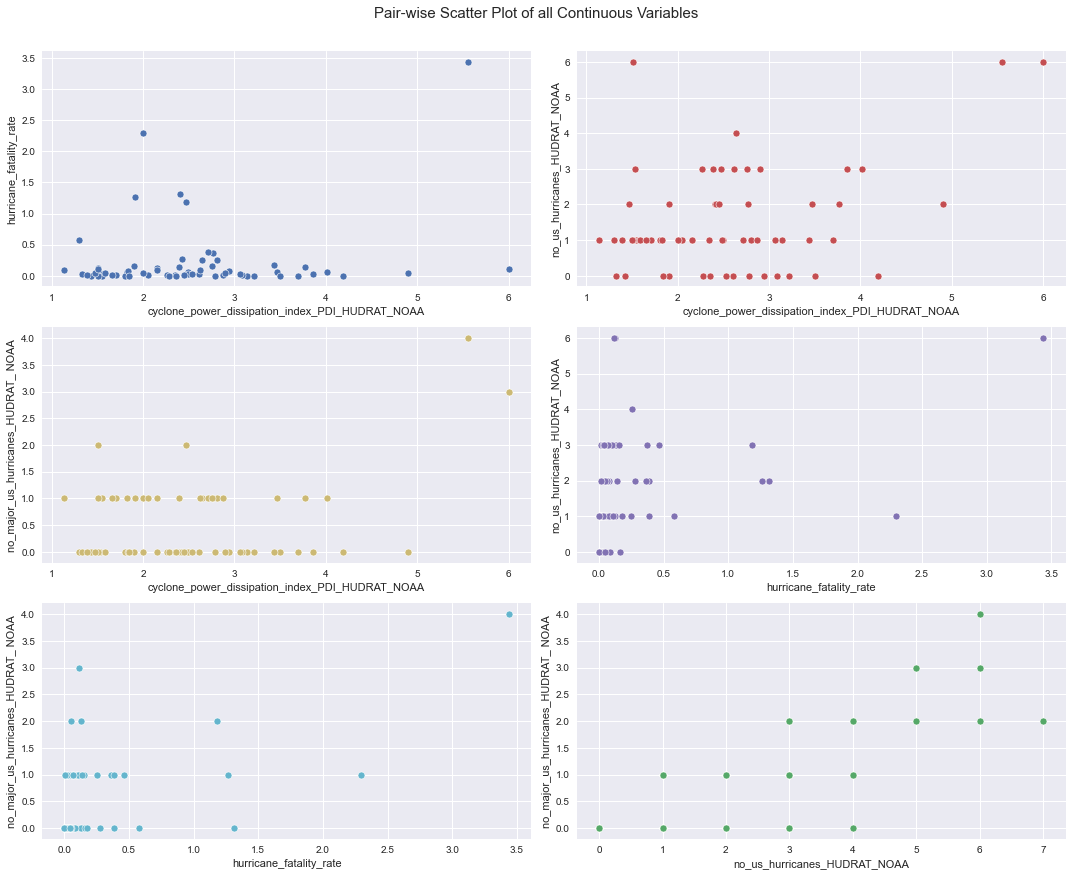

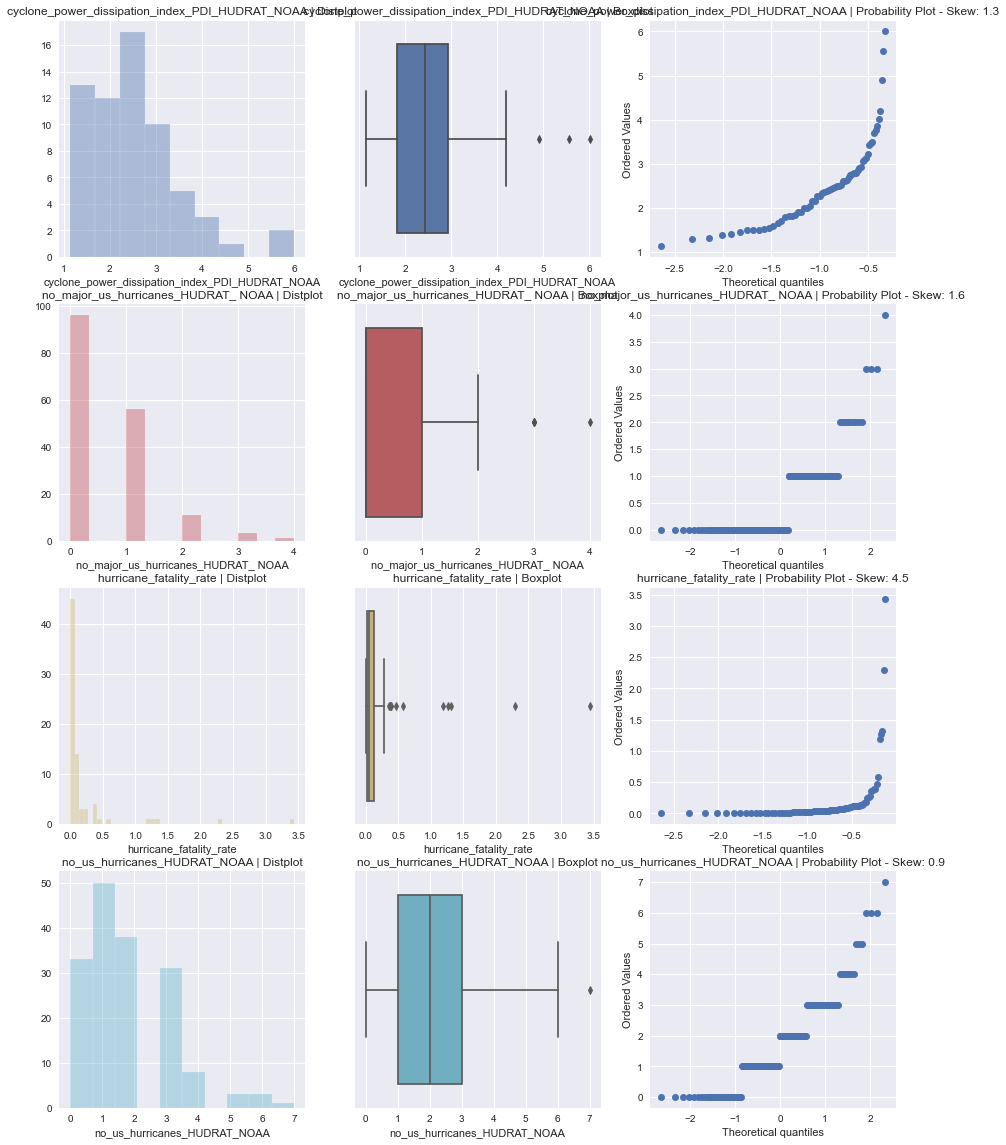

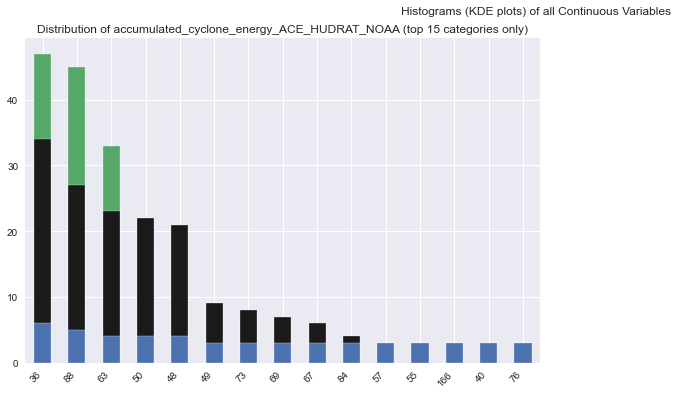

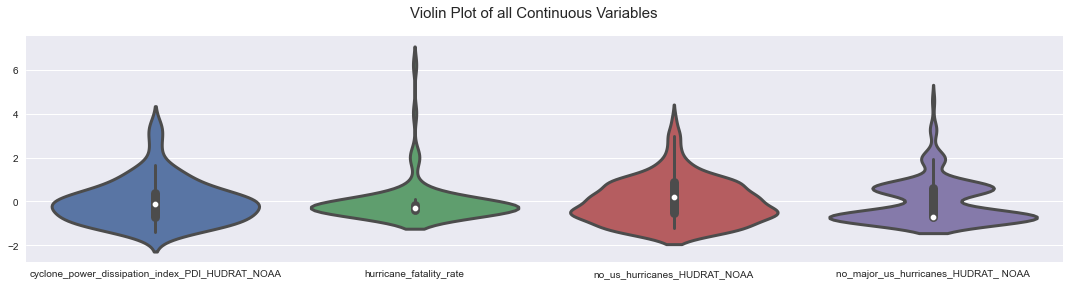

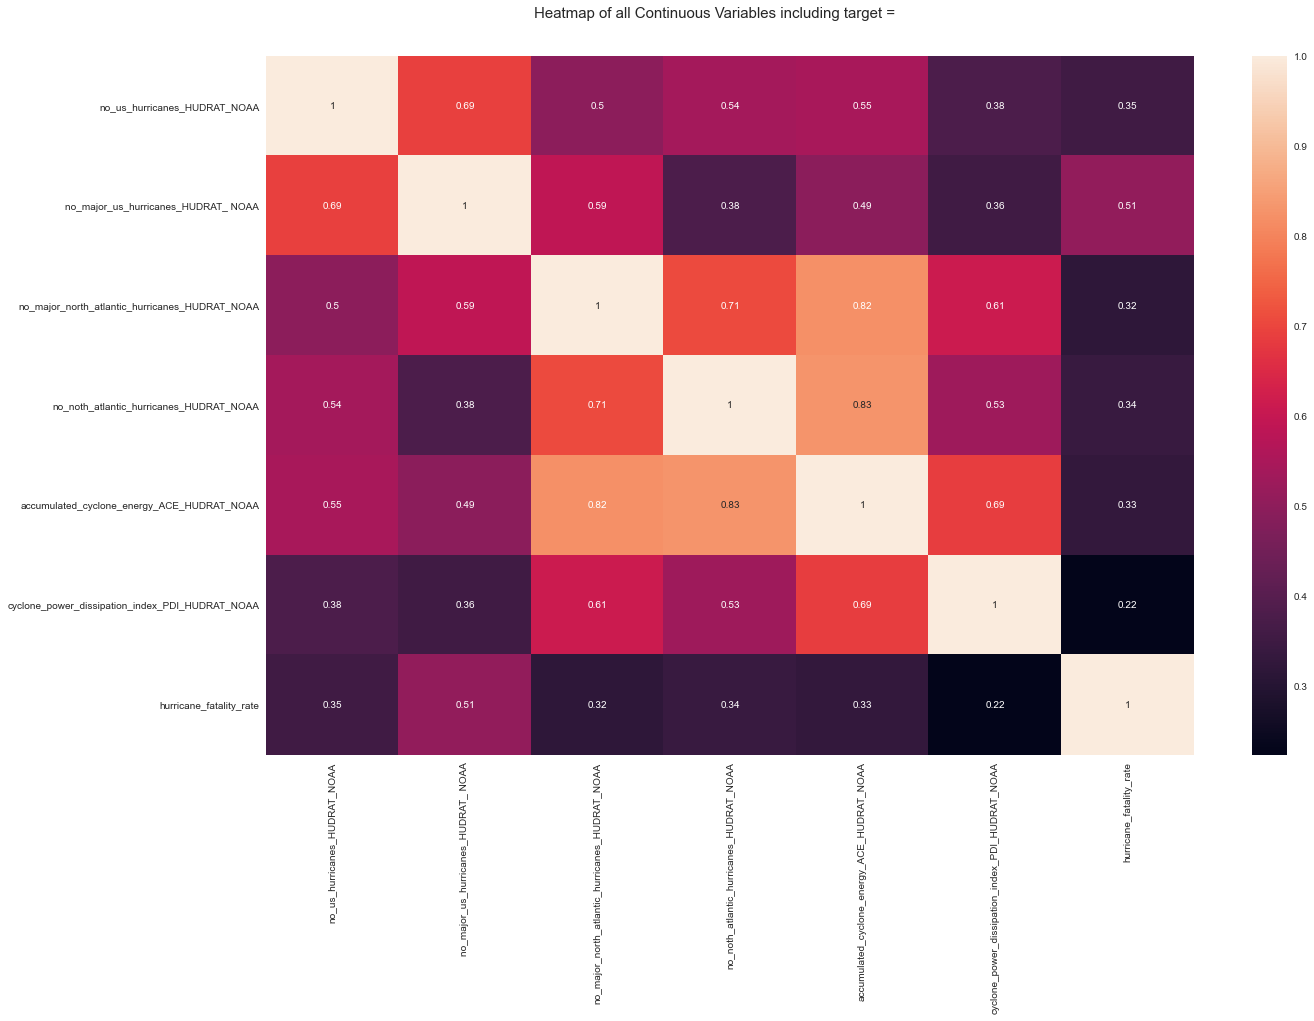

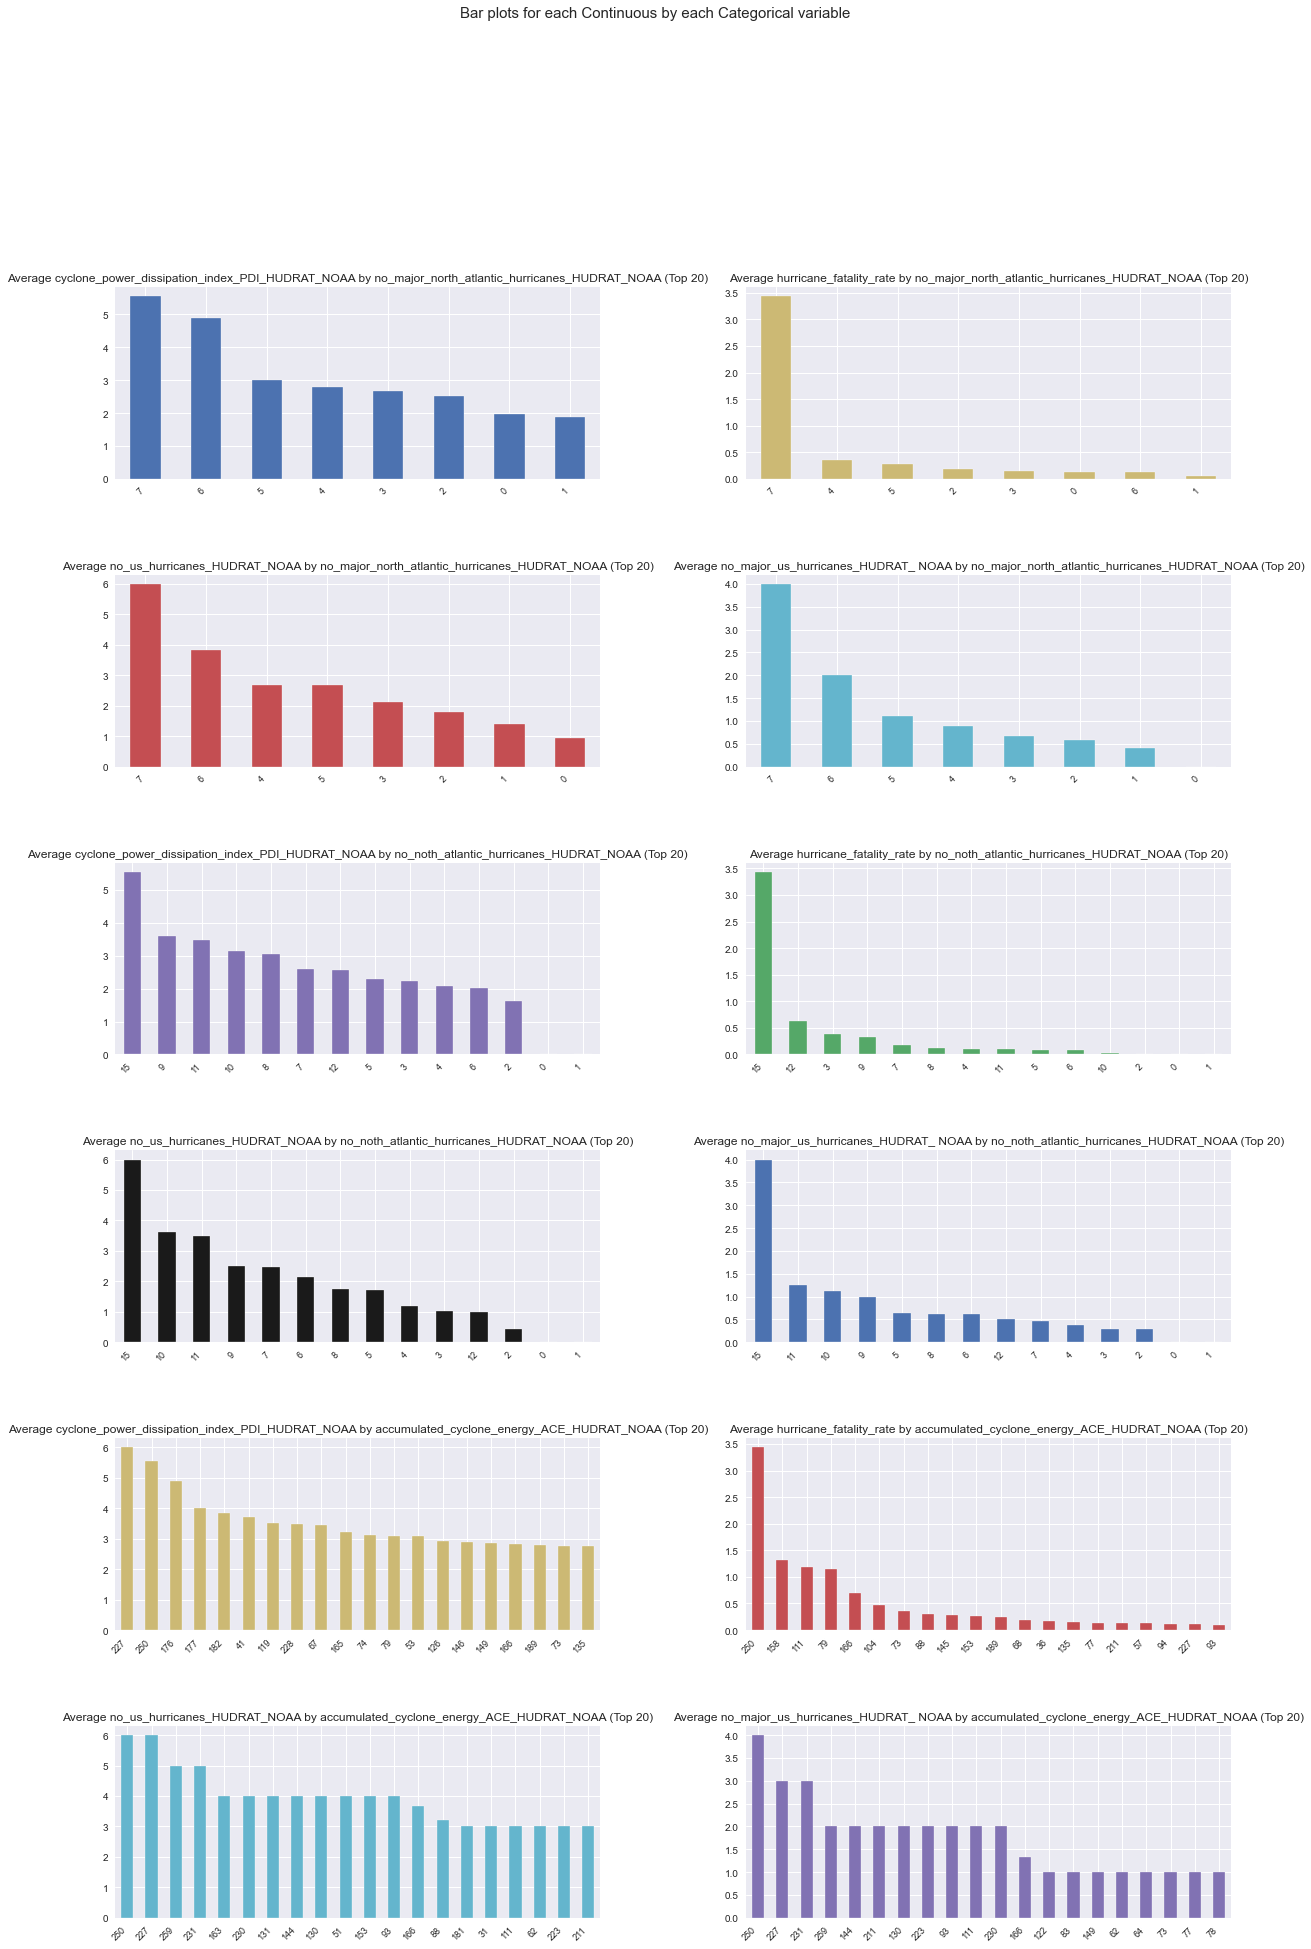

Time to run AutoViz (in seconds) = 13.330

 ###################### VISUALIZATION Completed ########################


In [22]:
#north_atlantic_hurricanes_stats is: hurricanes_us_df
#Trying this to see what happens
df = AV.AutoViz('north_atlantic_hurricanes_stats.csv')


Shape of your Data Set: (99, 16)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  13
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  1
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  1
    Number of ID Columns =  0
    Number of Columns to Delete =  1
    16 Predictors classified...
        This does not include the Target column(s)
        1 variables removed since they were ID or low-information variables
Number of All Scatter Plots = 91


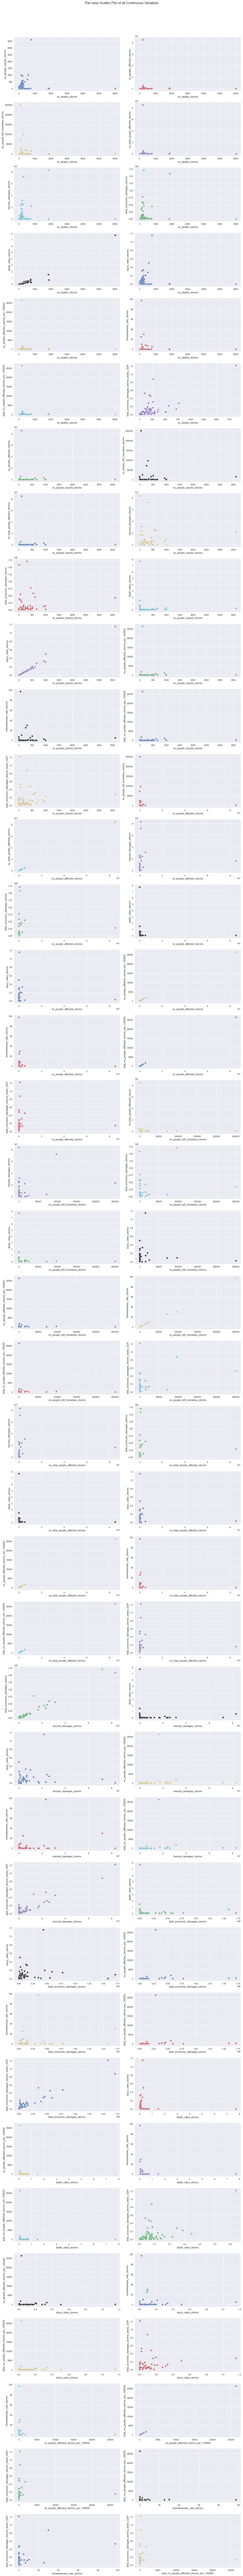

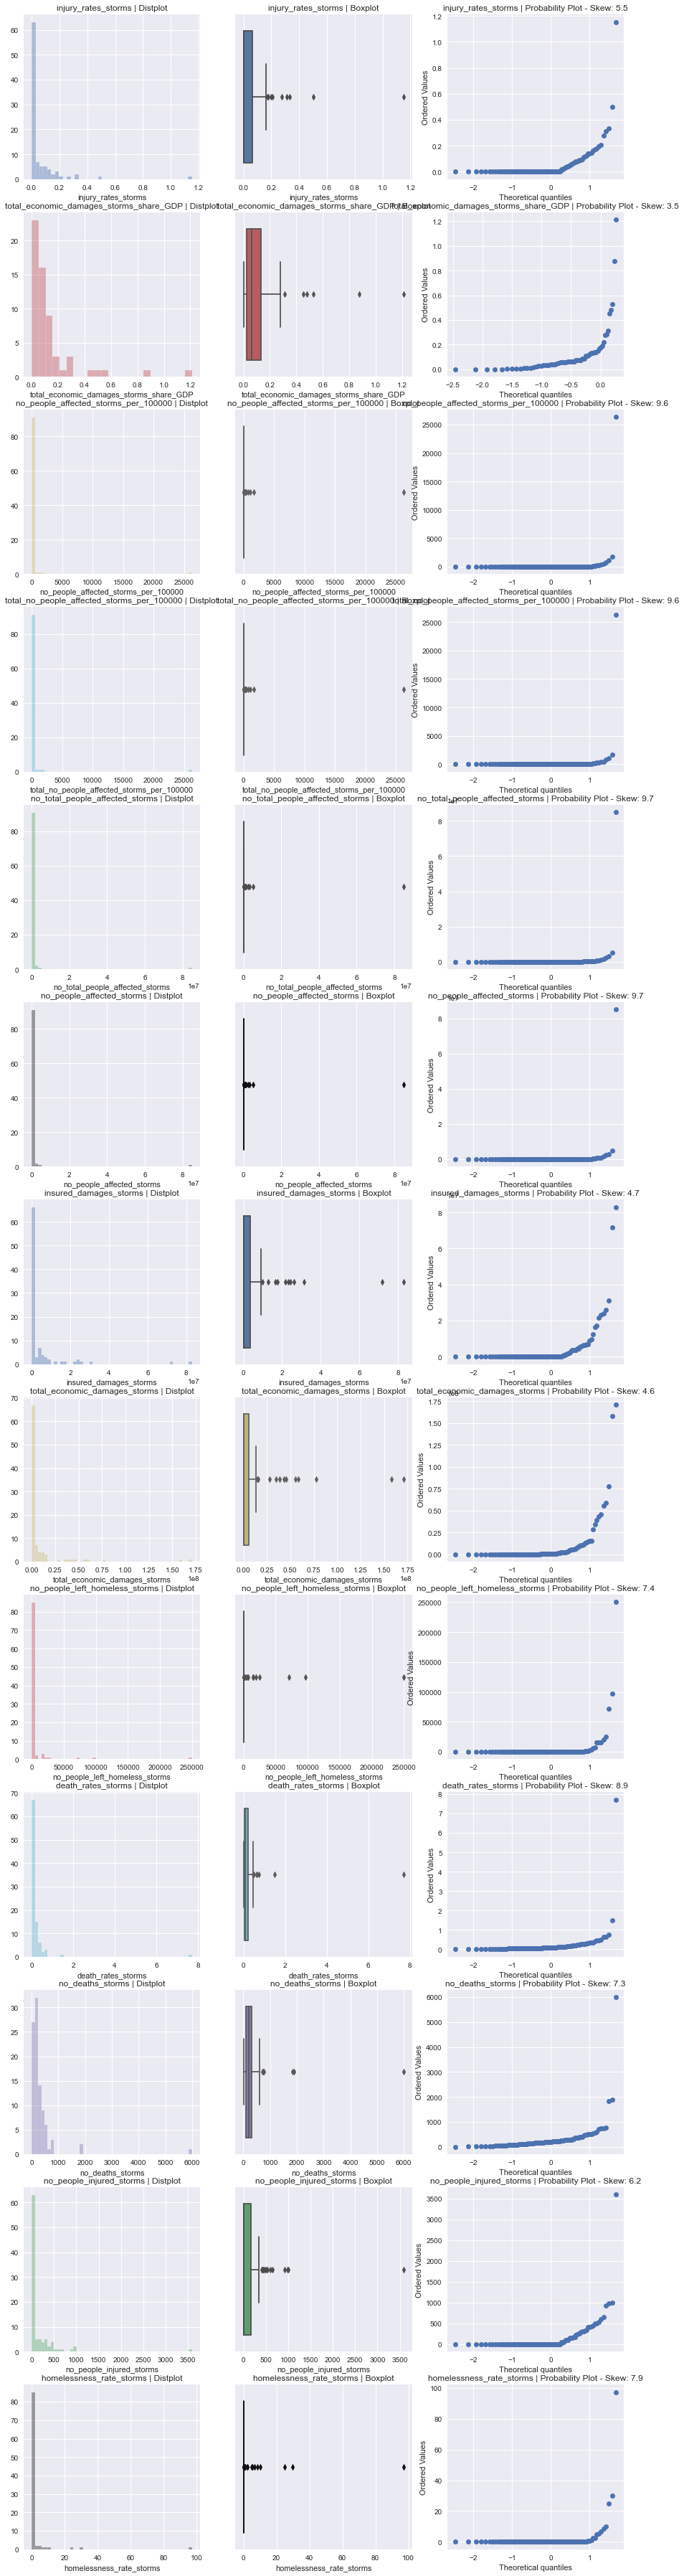

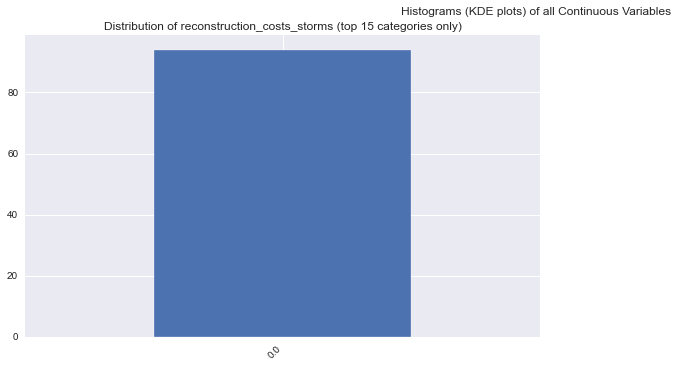

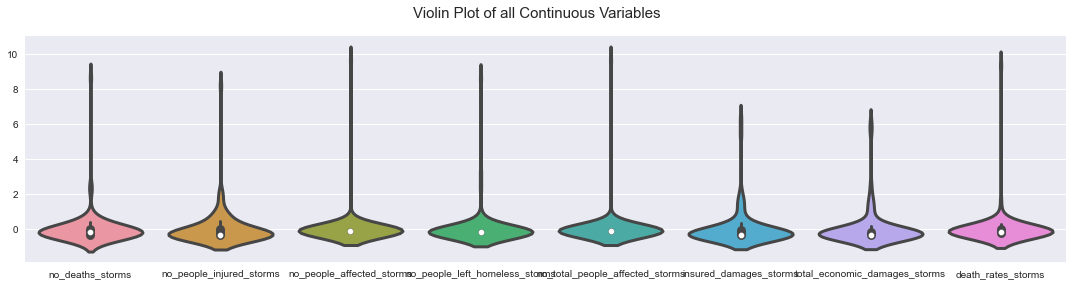

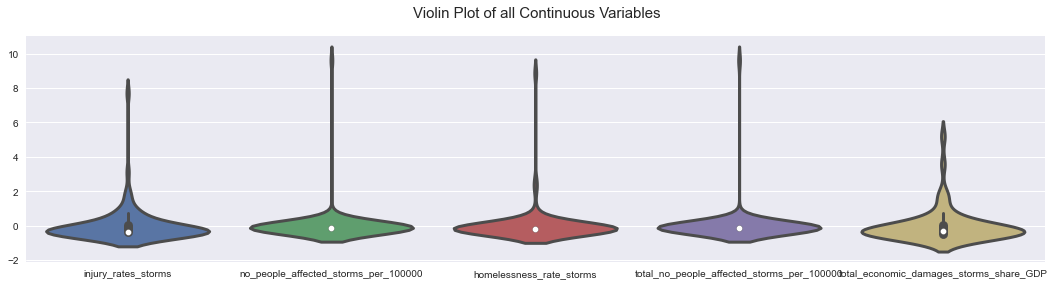

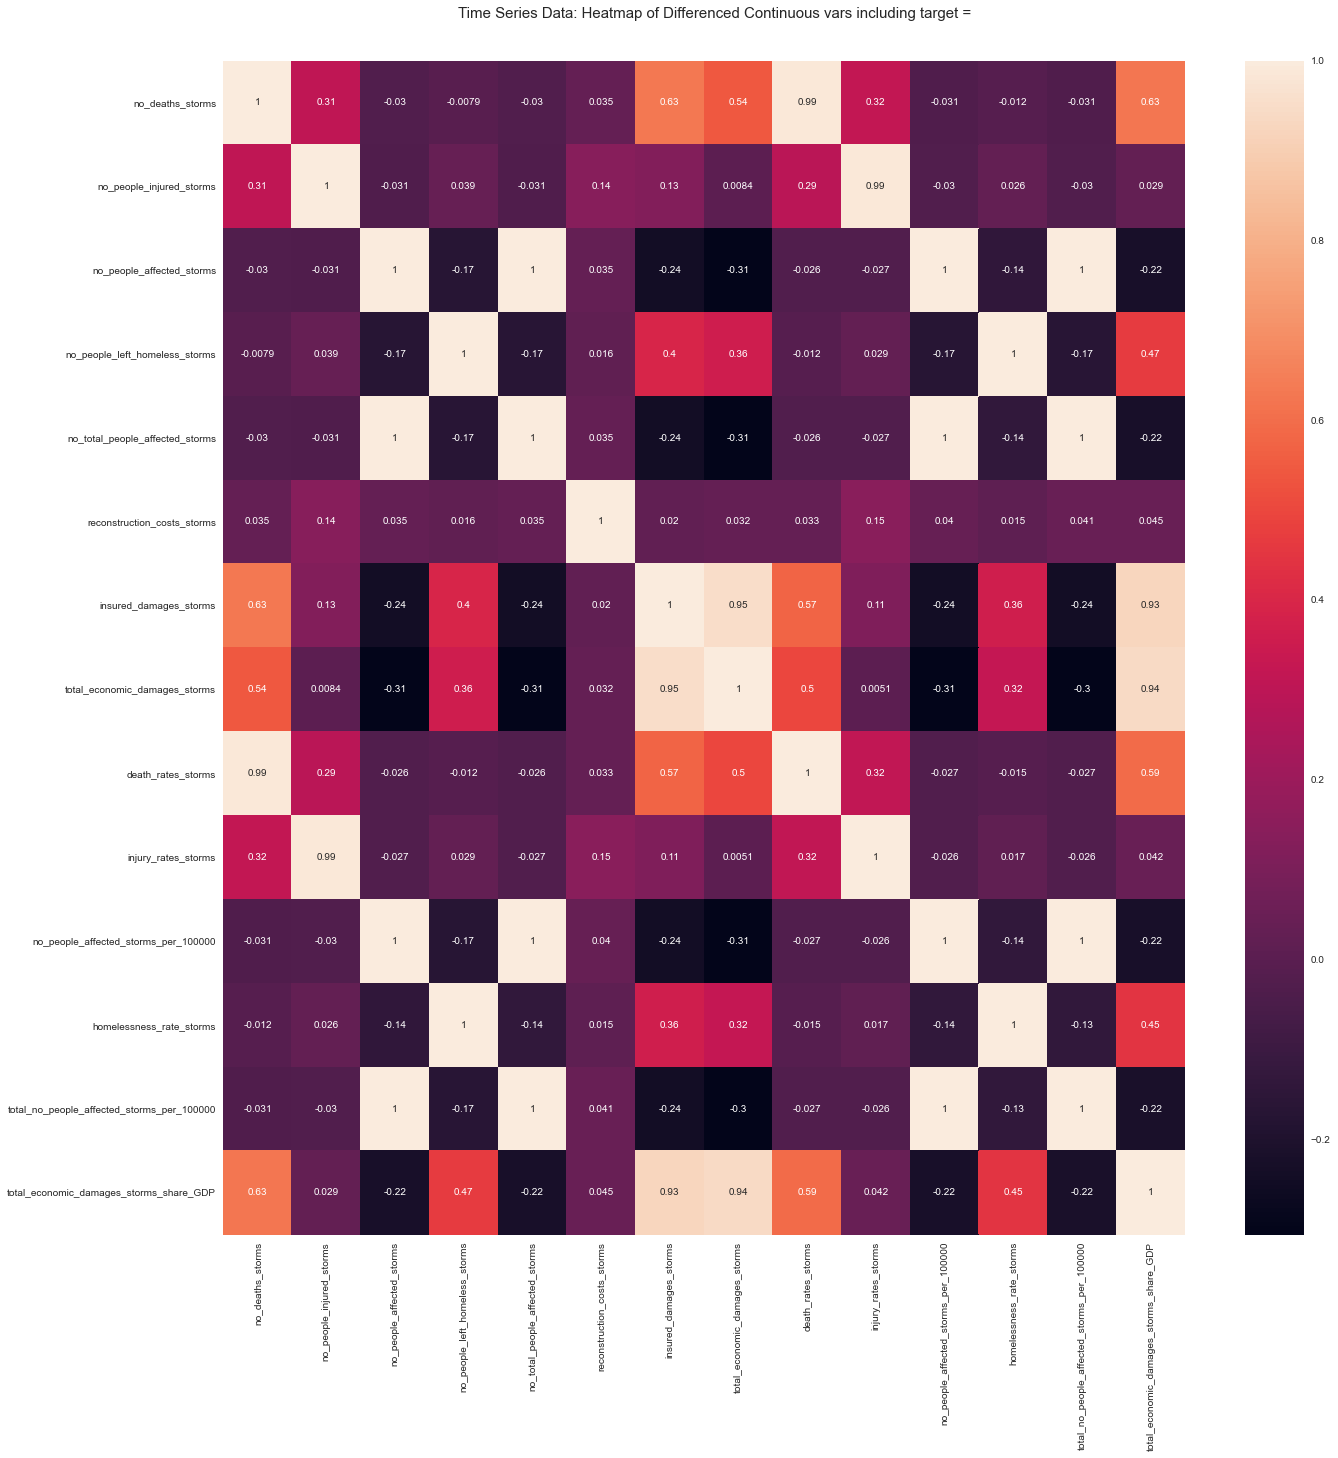

No categorical or numeric vars in data set. Hence no bar charts.
Time to run AutoViz (in seconds) = 49.251

 ###################### VISUALIZATION Completed ########################


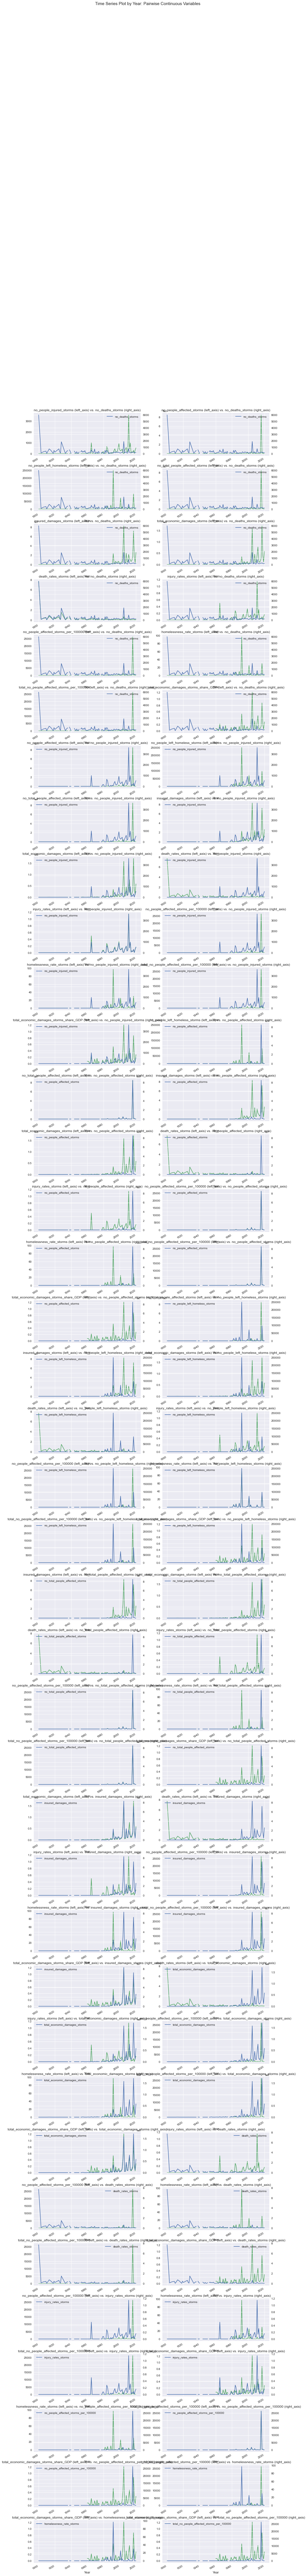

In [12]:
#disaster_us_storm_df is:, disaster_us_storm_df
#Trying this to see what happens
df2 = AV.AutoViz("disaster_us_storm.csv")

In [9]:
# Column names
hurricanes_us_df.columns


Index(['Entity', 'Year', 'no_us_hurricanes_HUDRAT_NOAA',
       'no_major_us_hurricanes_HUDRAT_ NOAA',
       'no_major_north_atlantic_hurricanes_HUDRAT_NOAA',
       'no_noth_atlantic_hurricanes_HUDRAT_NOAA',
       'accumulated_cyclone_energy_ACE_HUDRAT_NOAA',
       'cyclone_power_dissipation_index_PDI_HUDRAT_NOAA',
       'hurricane_fatality_rate', 'ACE', 'deaths_hurricanes_us',
       'total_economic_damages_storms', 'death_bin'],
      dtype='object')

In [10]:
# Second file column names
disaster_us_storm_df.columns

Index(['no_deaths_storms', 'no_people_injured_storms',
       'no_people_affected_storms', 'no_people_left_homeless_storms',
       'no_total_people_affected_storms', 'reconstruction_costs_storms',
       'insured_damages_storms', 'total_economic_damages_storms',
       'death_rates_storms', 'injury_rates_storms',
       'no_people_affected_storms_per_100000', 'homelessness_rate_storms',
       'total_no_people_affected_storms_per_100000',
       'total_economic_damages_storms_share_GDP', 'Entity', 'Year'],
      dtype='object')

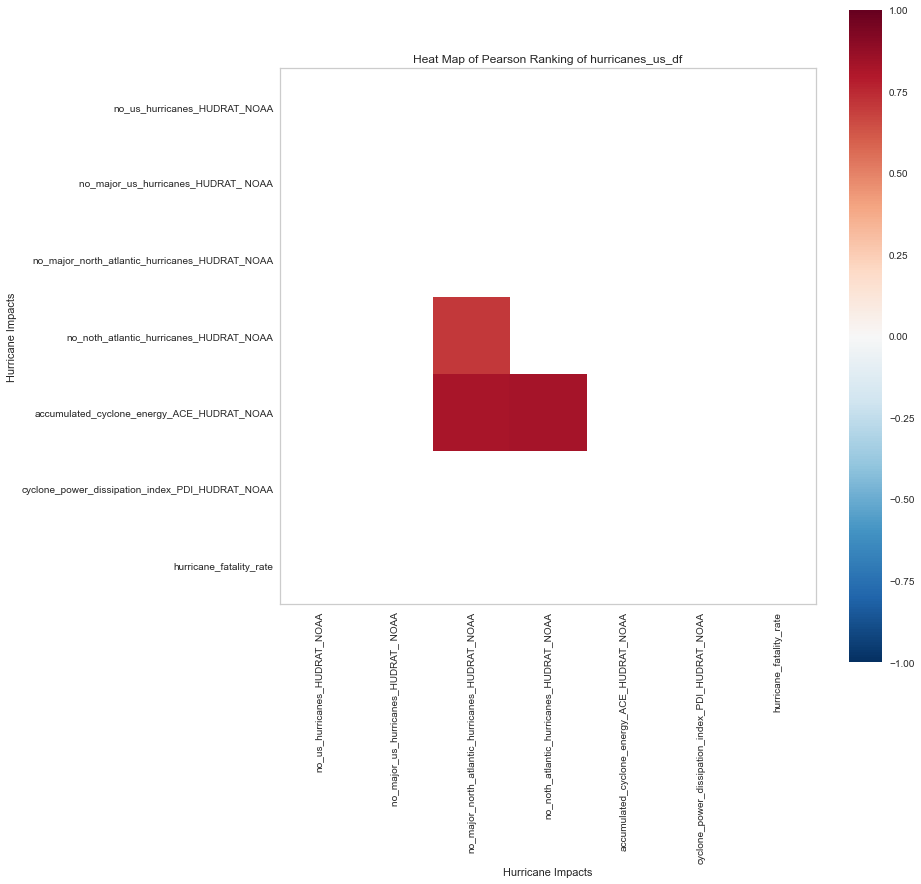

In [19]:

# Pearson Ranking
# set up the figure size

# New features
num_features = ['no_us_hurricanes_HUDRAT_NOAA','no_major_us_hurricanes_HUDRAT_ NOAA',
                'no_major_north_atlantic_hurricanes_HUDRAT_NOAA','no_noth_atlantic_hurricanes_HUDRAT_NOAA',
                'accumulated_cyclone_energy_ACE_HUDRAT_NOAA',
                'cyclone_power_dissipation_index_PDI_HUDRAT_NOAA','hurricane_fatality_rate']
plt.rcParams['figure.figsize'] = (12, 12)

# Import the package for visulization of the correlation
from yellowbrick.features import Rank2D

# Extract the numpy arrays from the data frame
X = hurricanes_us_df[num_features].to_numpy()

# instantiate the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(features=num_features, algorithm='pearson')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
plt.title("Heat Map of Pearson Ranking of hurricanes_us_df")
plt.xlabel("Hurricane Impacts")
plt.ylabel("Hurricane Impacts")
plt.show()

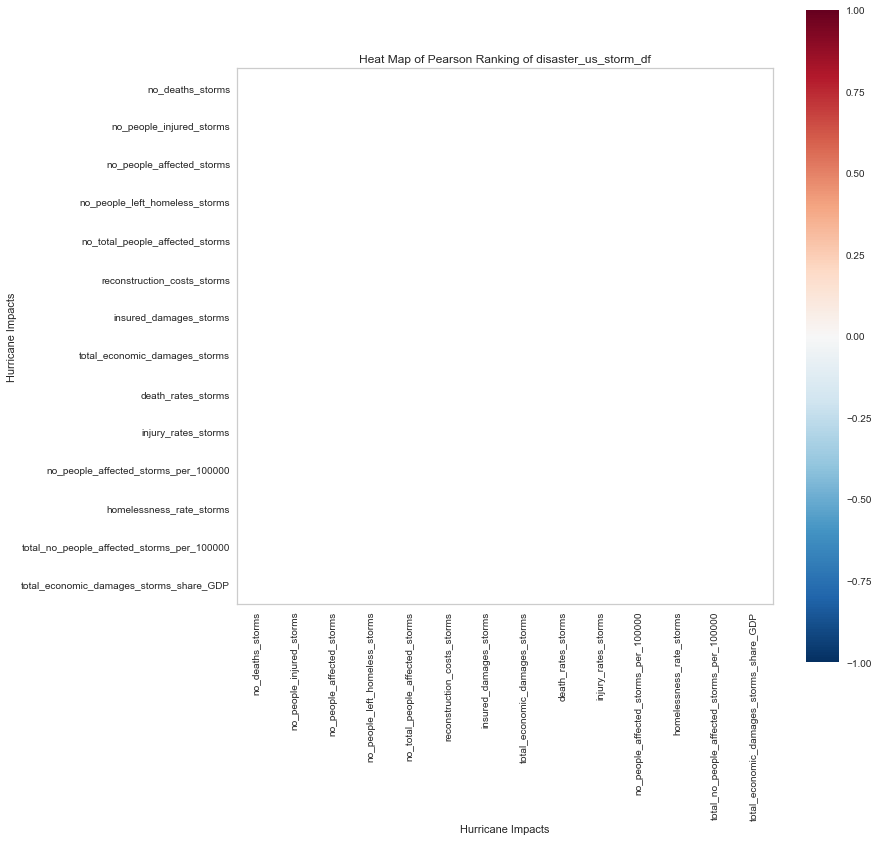

In [20]:
# Pearson Ranking
# set up the figure size

# New features
num_features = ['no_deaths_storms', 'no_people_injured_storms','no_people_affected_storms', 'no_people_left_homeless_storms',
                'no_total_people_affected_storms', 'reconstruction_costs_storms',
                'insured_damages_storms', 'total_economic_damages_storms','death_rates_storms', 'injury_rates_storms',
                'no_people_affected_storms_per_100000', 'homelessness_rate_storms',
                'total_no_people_affected_storms_per_100000','total_economic_damages_storms_share_GDP']
plt.rcParams['figure.figsize'] = (12, 12)

# Import the package for visulization of the correlation
from yellowbrick.features import Rank2D

# Extract the numpy arrays from the data frame
X = disaster_us_storm_df[num_features].to_numpy()

# instantiate the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(features=num_features, algorithm='pearson')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
plt.title("Heat Map of Pearson Ranking of disaster_us_storm_df")
plt.xlabel("Hurricane Impacts")
plt.ylabel("Hurricane Impacts")
plt.show()

<AxesSubplot:title={'center':'All Feature Correlation Heat Map of hurricanes_us_df'}>

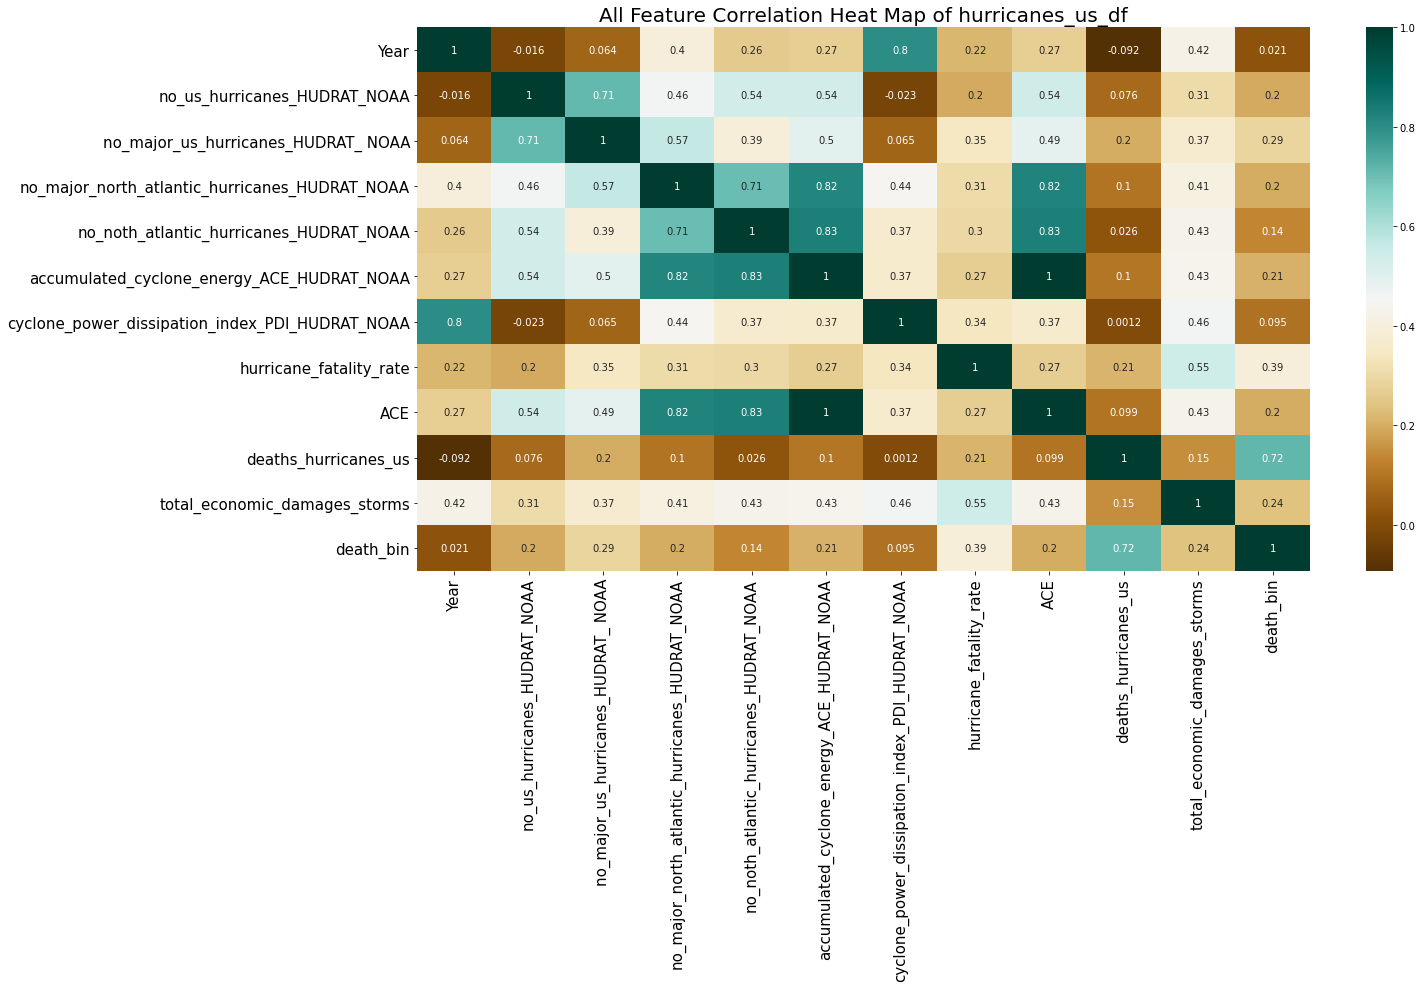

In [24]:
# Run full correlation on the data set using heat map
plt.figure(figsize=(20,10))
c= hurricanes_us_df.corr()
plt.title("All Feature Correlation Heat Map of hurricanes_us_df",fontsize=20)
plt.xlabel("Hurricanes Impact")
plt.ylabel("Hurricanes Impact")
plt.xticks(fontsize= 15)
plt.yticks(fontsize= 15)
sns.heatmap(c,cmap="BrBG",annot=True)

<AxesSubplot:title={'center':'All Feature Correlation Heat Map of disaster_us_storm_df'}>

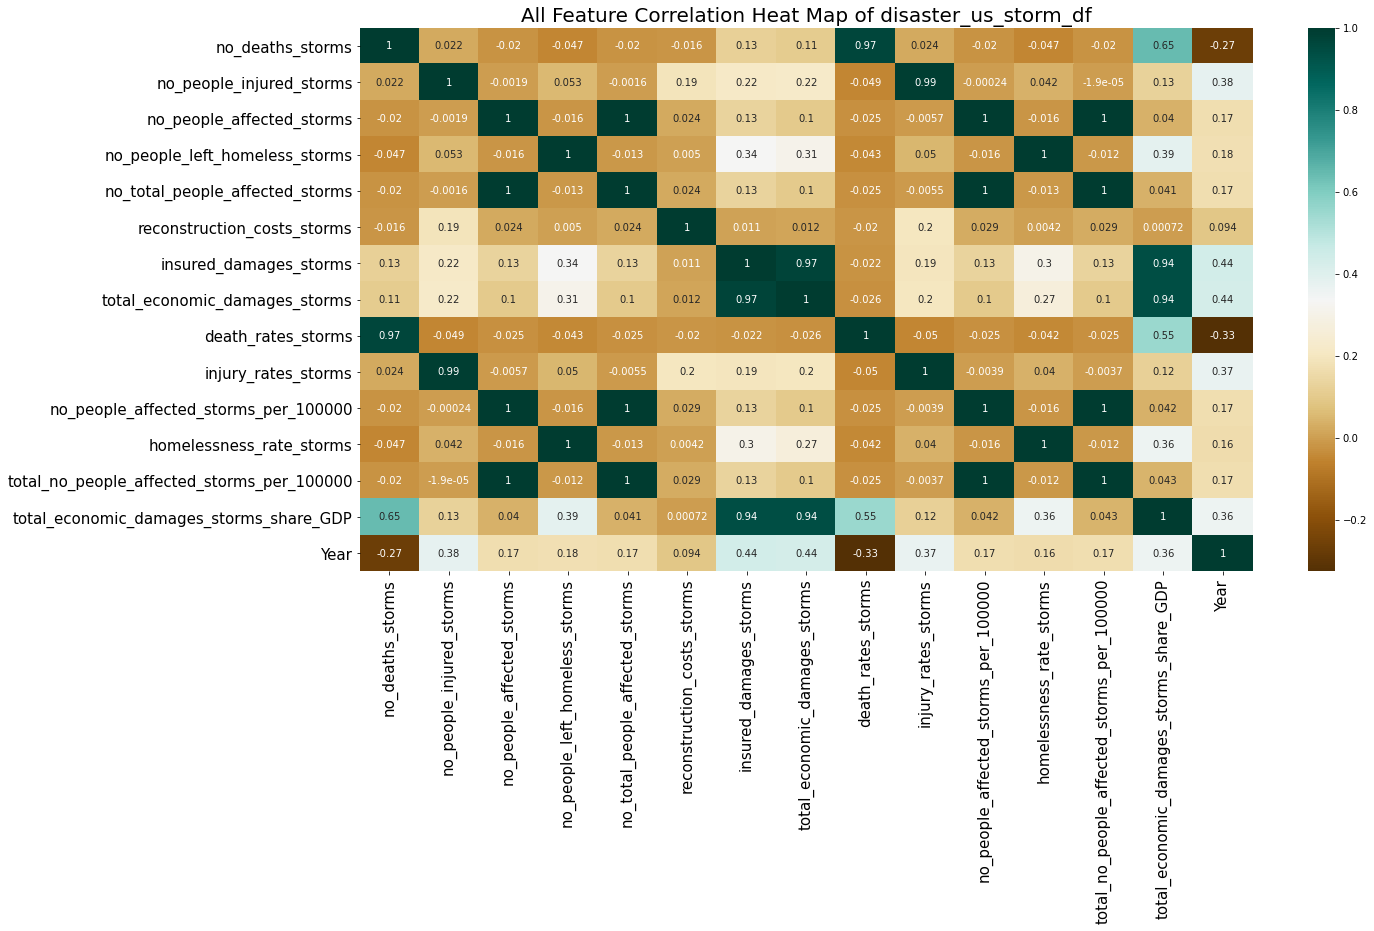

In [22]:
# Run full correlation on the data set using heat map
plt.figure(figsize=(20,10))
c= disaster_us_storm_df.corr()
plt.title("All Feature Correlation Heat Map of disaster_us_storm_df", fontsize=20)
plt.xlabel("Hurricanes Impact")
plt.ylabel("Hurricanes Impact")
plt.xticks(fontsize= 15)
plt.yticks(fontsize= 15)
sns.heatmap(c,cmap="BrBG",annot=True)

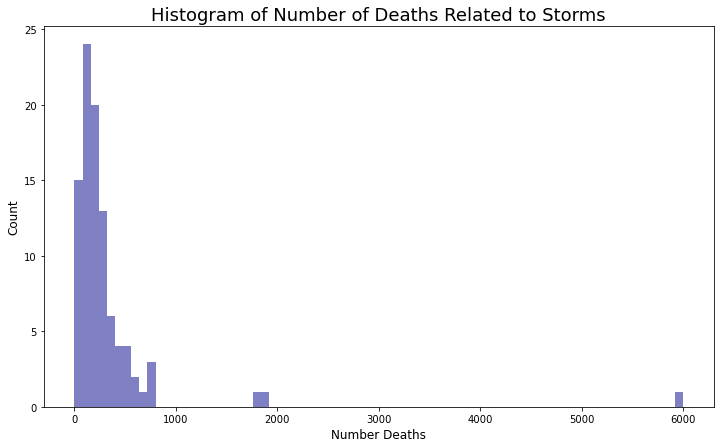

In [25]:
# Histograme of death by year

plt.rcParams['figure.figsize'] = (12, 7)
plt.hist(disaster_us_storm_df['no_deaths_storms'].dropna(), bins=75, facecolor='darkblue', alpha=0.5)
#Labels
plt.title('Histogram of Number of Deaths Related to Storms', fontsize = 18)
plt.xlabel('Number Deaths', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.ticklabel_format(axis='x', style='plain') 
plt.show()

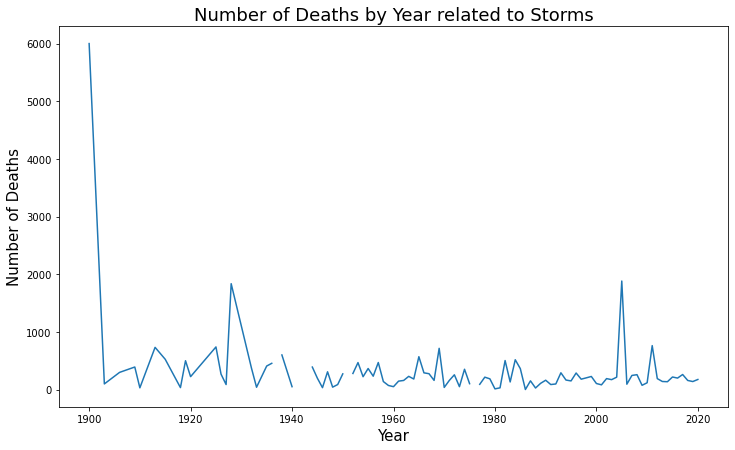

In [12]:
# line chart number of deaths realated to storms

x1 = disaster_us_storm_df['Year']
y1 = disaster_us_storm_df['no_deaths_storms']

plt.rcParams['figure.figsize'] = (12, 7)
plt.plot(x1, y1)
plt.title('Number of Deaths by Year related to Storms', fontsize = 18)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Number of Deaths', fontsize = 15)
plt.show()

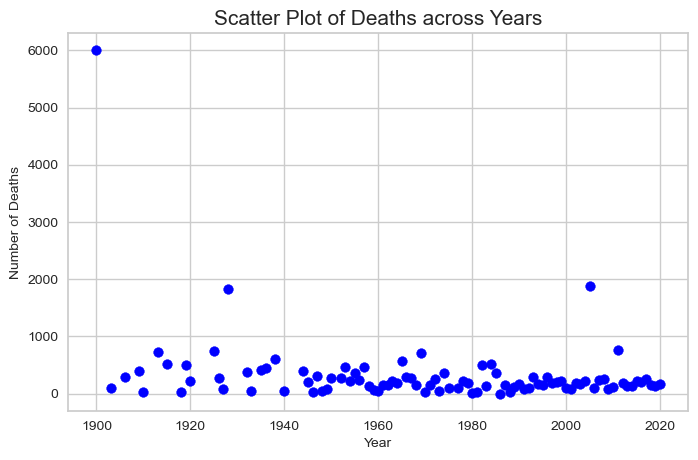

In [51]:
# Scatterplot - To check data
x = disaster_us_storm_df['Year']
y = disaster_us_storm_df['no_deaths_storms']

# Plot
plt.scatter(x,y,color='blue')
plt.rcParams.update({'figure.figsize':(8,5), 'figure.dpi':100})

# Labels
plt.title('Scatter Plot of Deaths across Years',fontsize=15)
plt.xlabel('Year',fontsize=10)
plt.ylabel('Number of Deaths',fontsize=10)
plt.ticklabel_format(axis='x', style='plain')
plt.ticklabel_format(axis='y', style='plain')
plt.show()

In [26]:
hurricanes_us_df.columns

Index(['Entity', 'Year', 'no_us_hurricanes_HUDRAT_NOAA',
       'no_major_us_hurricanes_HUDRAT_ NOAA',
       'no_major_north_atlantic_hurricanes_HUDRAT_NOAA',
       'no_noth_atlantic_hurricanes_HUDRAT_NOAA',
       'accumulated_cyclone_energy_ACE_HUDRAT_NOAA',
       'cyclone_power_dissipation_index_PDI_HUDRAT_NOAA',
       'hurricane_fatality_rate', 'ACE', 'deaths_hurricanes_us',
       'total_economic_damages_storms', 'death_bin'],
      dtype='object')

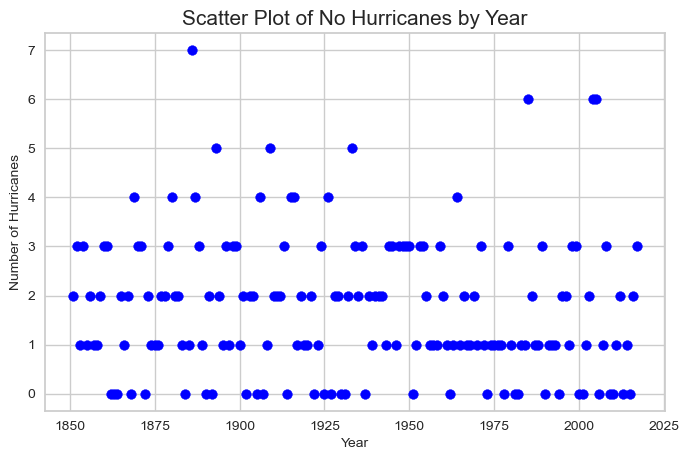

In [53]:
# Scatterplot - To check data
x = hurricanes_us_df['Year']
y = hurricanes_us_df['no_us_hurricanes_HUDRAT_NOAA']

# Plot
plt.scatter(x,y,color='blue')
plt.rcParams.update({'figure.figsize':(8,5), 'figure.dpi':100})

#Labels
plt.title('Scatter Plot of No Hurricanes by Year',fontsize=15)
plt.xlabel('Year',fontsize=10)
plt.ylabel('Number of Hurricanes',fontsize=10)
plt.ticklabel_format(axis='x', style='plain')
plt.ticklabel_format(axis='y', style='plain')
plt.show()

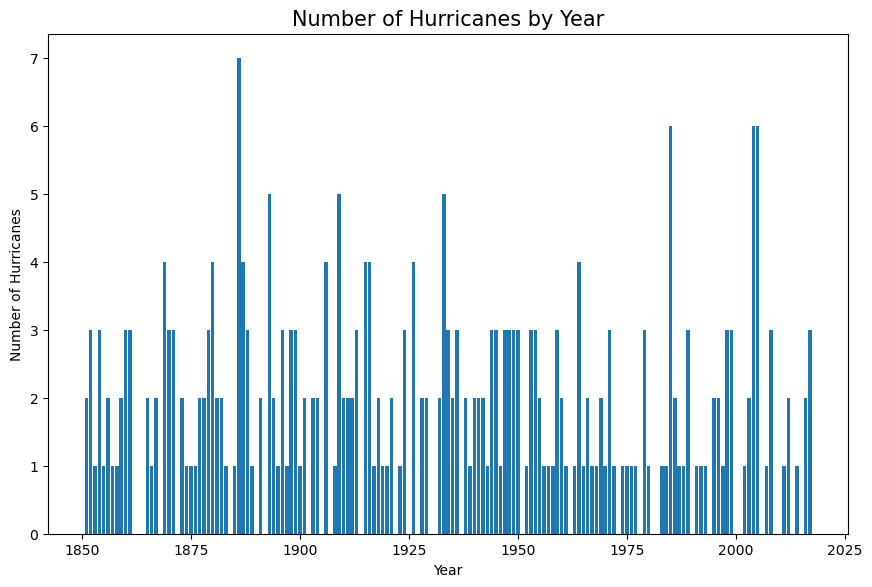

In [11]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
year = hurricanes_us_df['Year']
no_h = hurricanes_us_df['no_us_hurricanes_HUDRAT_NOAA']
ax.bar(year,no_h)
plt.title('Number of Hurricanes by Year',fontsize=15)
plt.xlabel('Year',fontsize=10)
plt.ylabel('Number of Hurricanes',fontsize=10)
plt.show()

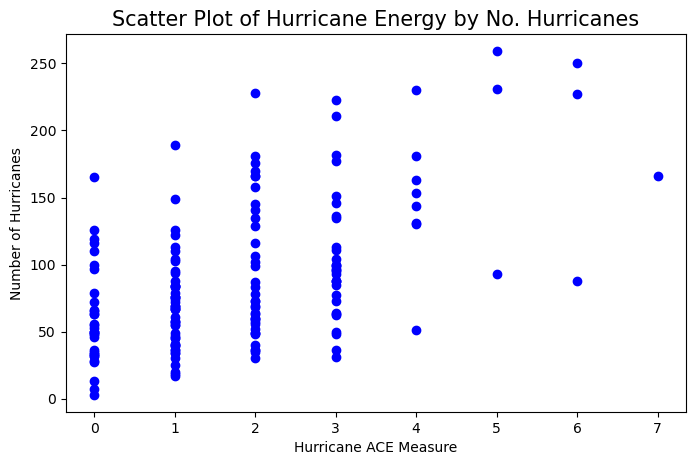

In [9]:
# Scatterplot - To check data
plt.clf()

x = hurricanes_us_df['no_us_hurricanes_HUDRAT_NOAA']
y = hurricanes_us_df['accumulated_cyclone_energy_ACE_HUDRAT_NOAA']

# Plot
plt.scatter(x,y,color='blue')
plt.rcParams.update({'figure.figsize':(8,5), 'figure.dpi':100})

#Labels
plt.title('Scatter Plot of Hurricane Energy by No. Hurricanes',fontsize=15)
plt.xlabel('Hurricane ACE Measure',fontsize=10)
plt.ylabel('Number of Hurricanes',fontsize=10)
plt.ticklabel_format(axis='x', style='plain')
plt.ticklabel_format(axis='y', style='plain')
plt.show()

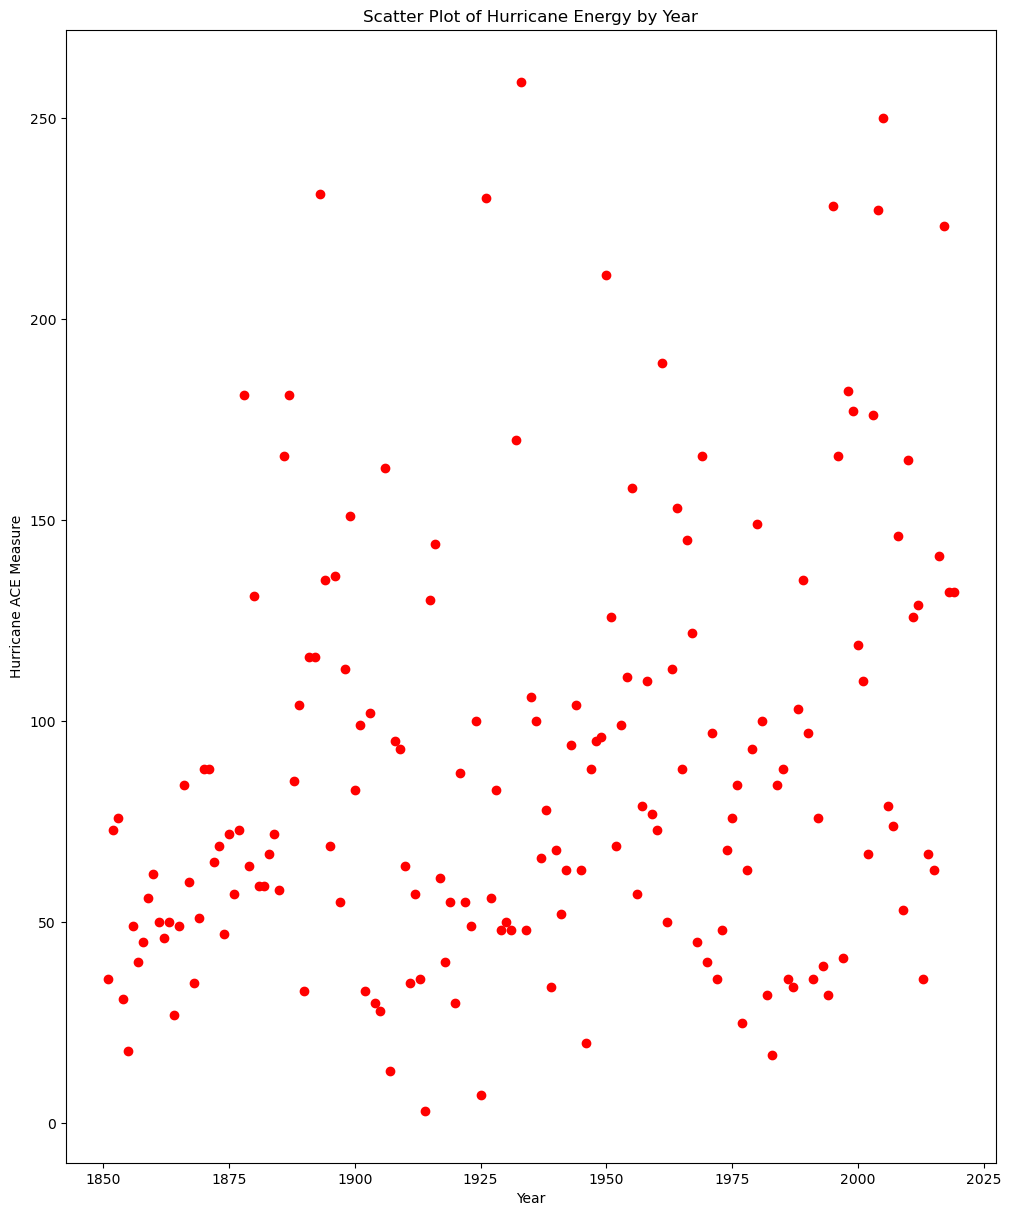

In [16]:
# Scatterplot - To check data
y = hurricanes_us_df['accumulated_cyclone_energy_ACE_HUDRAT_NOAA']
x = hurricanes_us_df['Year']

# Plot
plt.scatter(x,y,color='red')
plt.rcParams.update({'figure.figsize':(8,8), 'figure.dpi':100})

#Labels
plt.title('Scatter Plot of Hurricane Energy by Year',fontsize=12)
plt.ylabel('Hurricane ACE Measure',fontsize=10)
plt.xlabel('Year',fontsize=10)
plt.ticklabel_format(axis='x', style='plain')
plt.ticklabel_format(axis='y', style='plain')
plt.show()

Note: reducing the data to 1950 and greater since economic damages have not been record before 1950.

In [17]:
# Filter data down to US only
hurricanes_us_1900_df = hurricanes_us_df[hurricanes_us_df['Year'] >= 1900]

In [18]:
# Drop hurricane_fatality_rate
hurricanes_us_1900_df.drop(['hurricane_fatality_rate'], axis=1)

Entity  Year  no_us_hurricanes_HUDRAT_NOAA  \
49   North Atlantic  1900                             1   
50   North Atlantic  1901                             2   
51   North Atlantic  1902                             0   
52   North Atlantic  1903                             2   
53   North Atlantic  1904                             2   
..              ...   ...                           ...   
164  North Atlantic  2015                             0   
165  North Atlantic  2016                             2   
166  North Atlantic  2017                             3   
167  North Atlantic  2018                             8   
168  North Atlantic  2019                             6   

     no_major_us_hurricanes_HUDRAT_ NOAA  \
49                                     1   
50                                     0   
51                                     0   
52                                     0   
53                                     0   
..                                   ...   
164                                    0   
165                                    0   
166                                    2   
167                                    2   
168                                    3   

     no_major_north_atlantic_hurricanes_HUDRAT_NOAA  \
49                                                2   
50                                                0   
51                                                0   
52                                                1   
53                                                0   
..                                              ...   
164                                               2   
165                                               4   
166                                               6   
167                                               2   
168                                               2   

     no_noth_atlantic_hurricanes_HUDRAT_NOAA  \
49                                         3   
50                                         6   
51                                         3   
52                                         7   
53                                         4   
..                                       ...   
164                                        4   
165                                        7   
166                                       10   
167                                        8   
168                                        8   

     accumulated_cyclone_energy_ACE_HUDRAT_NOAA  \
49                                           83   
50                                           99   
51                                           33   
52                                          102   
53                                           30   
..                                          ...   
164                                          63   
165                                         141   
166                                         223   
167                                         132   
168                                         132   

     cyclone_power_dissipation_index_PDI_HUDRAT_NOAA       ACE  \
49                                               0.0   83.3450   
50                                               0.0   98.9750   
51                                               0.0   32.6500   
52                                               0.0  102.0700   
53                                               0.0   30.3450   
..                                               ...       ...   
164                                              NaN   62.6850   
165                                              NaN  141.2525   
166                                              NaN  224.8775   
167                                              NaN  132.5825   
168                                              NaN  132.2025   

     deaths_hurricanes_us  total_economic_damages_storms  death_bin  
49                 6000.0                        30000.0     

In [28]:
hurricanes_us_1900_df.columns

Index(['Entity', 'Year', 'no_us_hurricanes_HUDRAT_NOAA',
       'no_major_us_hurricanes_HUDRAT_ NOAA',
       'no_major_north_atlantic_hurricanes_HUDRAT_NOAA',
       'no_noth_atlantic_hurricanes_HUDRAT_NOAA',
       'accumulated_cyclone_energy_ACE_HUDRAT_NOAA',
       'cyclone_power_dissipation_index_PDI_HUDRAT_NOAA',
       'hurricane_fatality_rate', 'ACE', 'deaths_hurricanes_us',
       'total_economic_damages_storms', 'death_bin'],
      dtype='object')

## Modeling

In [19]:
# Import libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.formula.api import ols


Notes:
Reduce years from 1850 to 1900 due to a lot of missing data.

In [20]:
# filter for future use
hurricanes_1900_df = hurricanes_us_df[hurricanes_us_df['Year'] >= 1900]

In [21]:
hurricanes_1900_df.head

<bound method NDFrame.head of              Entity  Year  no_us_hurricanes_HUDRAT_NOAA  \
49   North Atlantic  1900                             1   
50   North Atlantic  1901                             2   
51   North Atlantic  1902                             0   
52   North Atlantic  1903                             2   
53   North Atlantic  1904                             2   
..              ...   ...                           ...   
164  North Atlantic  2015                             0   
165  North Atlantic  2016                             2   
166  North Atlantic  2017                             3   
167  North Atlantic  2018                             8   
168  North Atlantic  2019                             6   

     no_major_us_hurricanes_HUDRAT_ NOAA  \
49                                     1   
50                                     0   
51                                     0   
52                                     0   
53                                     0 

In [22]:
# Change data types for modeling

hurricanes_1900_df['no_us_hurricanes_HUDRAT_NOAA'] = hurricanes_1900_df['no_us_hurricanes_HUDRAT_NOAA'].astype(int)
hurricanes_1900_df['no_major_us_hurricanes_HUDRAT_ NOAA'] = hurricanes_1900_df['no_major_us_hurricanes_HUDRAT_ NOAA'].astype(int)
hurricanes_1900_df['no_major_north_atlantic_hurricanes_HUDRAT_NOAA'] = hurricanes_1900_df['no_major_north_atlantic_hurricanes_HUDRAT_NOAA'].astype(int)
hurricanes_1900_df['no_noth_atlantic_hurricanes_HUDRAT_NOAA'] = hurricanes_1900_df['no_noth_atlantic_hurricanes_HUDRAT_NOAA'].astype(int)
hurricanes_1900_df['accumulated_cyclone_energy_ACE_HUDRAT_NOAA'] = hurricanes_1900_df['accumulated_cyclone_energy_ACE_HUDRAT_NOAA'].astype(int)
hurricanes_1900_df['death_bin'] = hurricanes_1900_df['death_bin'].astype(int)

<ipython-input-22-ac42eb629da4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hurricanes_1900_df['no_us_hurricanes_HUDRAT_NOAA'] = hurricanes_1900_df['no_us_hurricanes_HUDRAT_NOAA'].astype(int)
<ipython-input-22-ac42eb629da4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hurricanes_1900_df['no_major_us_hurricanes_HUDRAT_ NOAA'] = hurricanes_1900_df['no_major_us_hurricanes_HUDRAT_ NOAA'].astype(int)
<ipython-input-22-ac42eb629da4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

In [23]:
# Change year to to int
hurricanes_1900_df['Year'] = hurricanes_1900_df['Year'].astype(int)

<ipython-input-23-b1ff7401944b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hurricanes_1900_df['Year'] = hurricanes_1900_df['Year'].astype(int)


In [34]:
hurricanes_1900_df.head()

Entity  Year  no_us_hurricanes_HUDRAT_NOAA  \
49  North Atlantic  1900                             1   
50  North Atlantic  1901                             2   
51  North Atlantic  1902                             0   
52  North Atlantic  1903                             2   
53  North Atlantic  1904                             2   

    no_major_us_hurricanes_HUDRAT_ NOAA  \
49                                    1   
50                                    0   
51                                    0   
52                                    0   
53                                    0   

    no_major_north_atlantic_hurricanes_HUDRAT_NOAA  \
49                                               2   
50                                               0   
51                                               0   
52                                               1   
53                                               0   

    no_noth_atlantic_hurricanes_HUDRAT_NOAA  \
49                                        3   
50                                        6   
51                                        3   
52                                        7   
53                                        4   

    accumulated_cyclone_energy_ACE_HUDRAT_NOAA  \
49                                          83   
50                                          99   
51                                          33   
52                                         102   
53                                          30   

    cyclone_power_dissipation_index_PDI_HUDRAT_NOAA  hurricane_fatality_rate  \
49                                              0.0                      0.0   
50                                              0.0                      0.0   
51                                              0.0                      0.0   
52                                              0.0                      0.0   
53                                              0.0                      0.0   

        ACE  deaths_hurricanes_us  total_economic_damages_storms  death_bin  
49   83.345                6000.0                        30000.0         10  
50   98.975                   0.0                            0.0          1  
51   32.650                   0.0                            0.0          1  
52  102.070                  98.0                            0.0          1  
53   30.345                   0.0                            0.0          1

### Linear regression model

In [36]:
# split the data in training and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [37]:
# train the model using linear regression
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression()

In [69]:
# used deaths_hurricanes_us
coeff = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff

Coefficient
no_us_hurricanes_HUDRAT_NOAA                     -53.974540
no_major_us_hurricanes_HUDRAT_ NOAA              262.029082
no_major_north_atlantic_hurricanes_HUDRAT_NOAA   -42.694718
no_noth_atlantic_hurricanes_HUDRAT_NOAA          -44.326837
accumulated_cyclone_energy_ACE_HUDRAT_NOAA         3.175403

In [70]:
# used deaths_hurricanes_us

y_pred = regressor.predict(X_test)

In [71]:
# used deaths_hurricanes_us
print(regressor.score(X_test, y_test))

-2.4876948515430244


In [72]:
# calculate rmse and r2
# used deaths_hurricanes_us
from sklearn.metrics import mean_squared_error, r2_score
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

In [73]:
# print rmse
rmse

312.24188966237466

In [74]:
# print r
r2

-2.4876948515430244

In [75]:
# Calculation of Mean Squared Error (MSE)
mean_squared_error(y_test,y_pred)

97494.99765993055

In [76]:
mean_absolute_error(y_test,y_pred)

270.6704113740778

In [77]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

df.head(25)

Actual   Predicted
97     42.0  251.255390
143   165.0  254.858900
144   150.0  463.229674
57      0.0  225.259542
146   180.0  186.768272
71      0.0  285.198459
56      0.0  327.506747
59     30.0  205.828009
94    196.0  541.387837
138   108.0  419.334123
82     40.0  619.077922
99    272.0  574.607641
51      0.0  258.034303
109    50.0  409.414166
168   139.0  727.615619
123   352.0  447.511690
79      0.0  270.953562
92      0.0  223.716258
160   762.0  151.286056
125     0.0  147.635387
112   229.0  152.700530
108    71.0  235.160728
65      0.0  394.902630
73      0.0  134.819598

In [47]:
print(('R-Squared :'), regressor.score(X_test, y_test))

R-Squared : -2.4876948515430244


C:\Users\Tushar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Tushar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


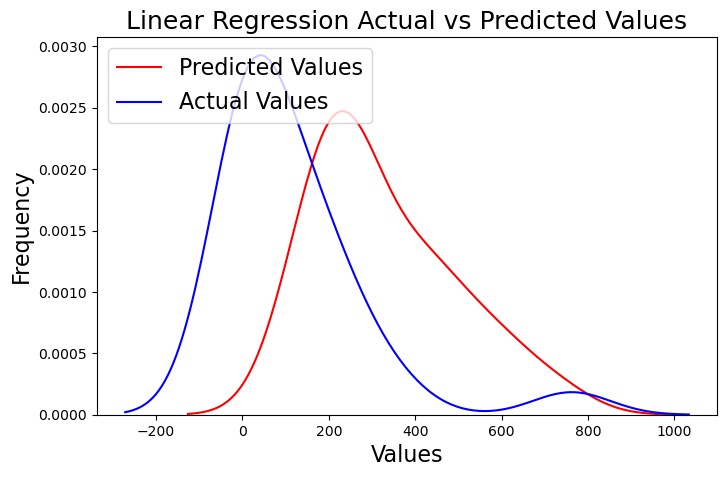

In [48]:
sns.distplot(y_pred, hist = False, color = 'r', label = 'Predicted Values')
sns.distplot(y_test, hist = False, color = 'b', label = 'Actual Values')
plt.title('Linear Regression Actual vs Predicted Values', fontsize = 18)
plt.xlabel('Values', fontsize = 16)
plt.ylabel('Frequency', fontsize = 16)
plt.legend(loc = 'upper left', fontsize = 16)
plt.ticklabel_format(style='plain', axis='x')


plt.savefig('ap.png')

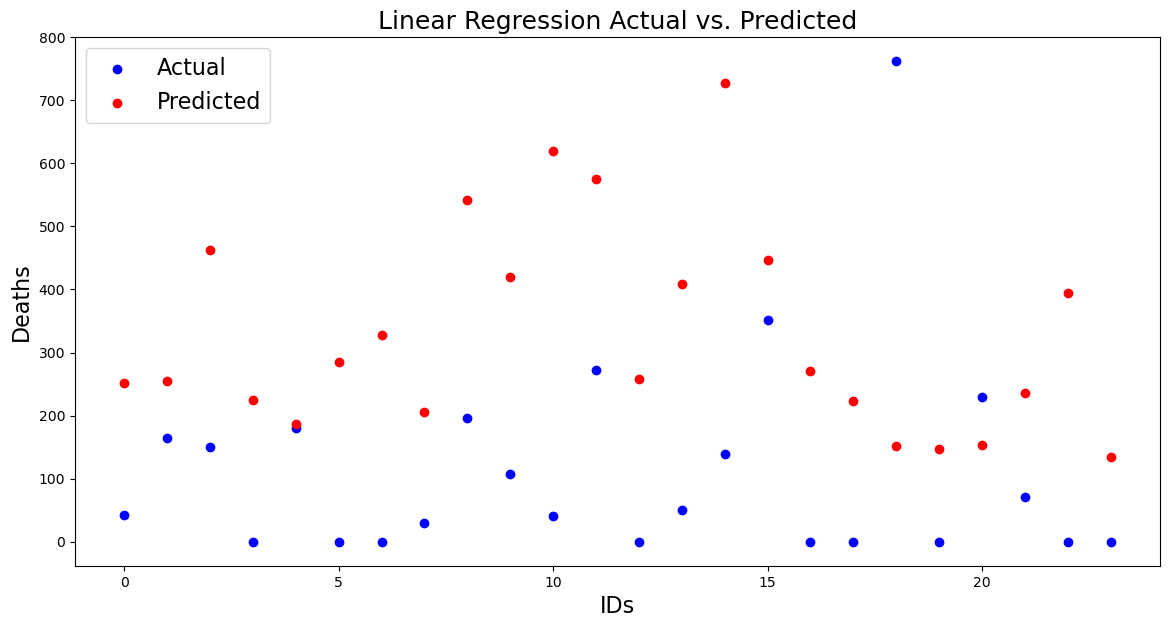

In [49]:
plt.figure(figsize=(14,7))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted')
plt.title('Linear Regression Actual vs. Predicted', fontsize = 18)
plt.xlabel('IDs', fontsize = 16)
plt.ylabel('Deaths', fontsize = 16)
plt.legend(loc = 'upper left', fontsize = 16)
plt.ticklabel_format(style='plain', axis='x')
plt.show()

#### Using death_bin as alternative to using actual number of deaths.

Note: below is done with bining of deaths to see if that increases model accuracy

In [24]:
# split out X and y
# Updated from deaths_hurricanes_us to death_bin

X = hurricanes_1900_df[['no_us_hurricanes_HUDRAT_NOAA',
       'no_major_us_hurricanes_HUDRAT_ NOAA',
       'no_major_north_atlantic_hurricanes_HUDRAT_NOAA',
       'no_noth_atlantic_hurricanes_HUDRAT_NOAA',
       'accumulated_cyclone_energy_ACE_HUDRAT_NOAA']]

y = hurricanes_1900_df['death_bin']

In [25]:
# split the data in training and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [26]:
# train the model using linear regression
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression()

In [39]:
# used death_bin
coeff2 = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff2

Coefficient
no_us_hurricanes_HUDRAT_NOAA                      -0.011755
no_major_us_hurricanes_HUDRAT_ NOAA                0.922708
no_major_north_atlantic_hurricanes_HUDRAT_NOAA    -0.154419
no_noth_atlantic_hurricanes_HUDRAT_NOAA           -0.099639
accumulated_cyclone_energy_ACE_HUDRAT_NOAA         0.010755

In [40]:
y_pred = regressor.predict(X_test)

In [41]:
print(regressor.score(X_test, y_test))

-1.0763589168854542


Note: The number improved with using binning. Original r2 was -2.47

In [42]:
from sklearn.metrics import mean_squared_error, r2_score
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

In [43]:
# print rmse
rmse

1.9501418472777152

In [44]:
r2

-1.0763589168854542

In [45]:
mean_squared_error(y_test,y_pred)

3.80305322450374

In [46]:
mean_absolute_error(y_test,y_pred)

1.6580823413052255

In [53]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

df.head(25)

Actual  Predicted
97        1   2.830455
143       2   2.182054
144       2   3.619981
57        1   2.394514
146       2   2.112673
71        1   2.274995
56        1   2.276630
59        1   2.348278
94        2   3.817487
138       2   3.469845
82        1   4.686403
99        3   4.193684
51        1   2.192809
109       1   3.113721
168       2   5.148093
123       4   3.071702
79        1   2.166441
92        1   2.328979
160       7   2.165016
125       1   2.121792
112       3   2.179623
108       1   2.846068
65        1   3.715417
73        1   2.369998

In [48]:
df.columns

Index(['Actual', 'Predicted'], dtype='object')

In [50]:
print(('R-Squared :'), regressor.score(X_test, y_test))

R-Squared : -1.0763589168854542


C:\Users\Tushar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Tushar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


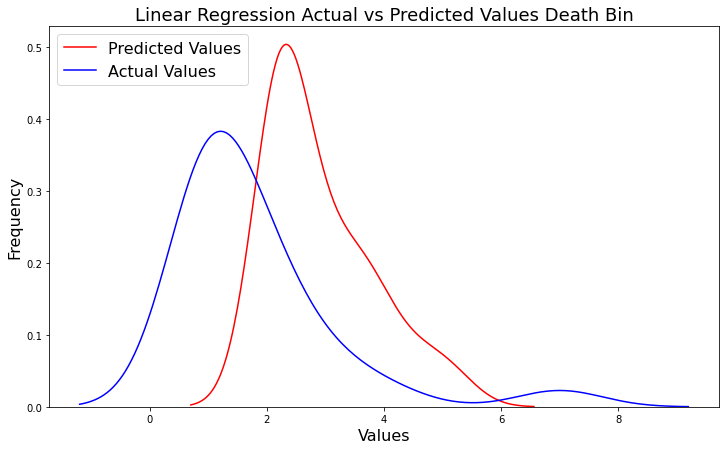

In [51]:
sns.distplot(y_pred, hist = False, color = 'r', label = 'Predicted Values')
sns.distplot(y_test, hist = False, color = 'b', label = 'Actual Values')
plt.title('Linear Regression Actual vs Predicted Values Death Bin', fontsize = 18)
plt.xlabel('Values', fontsize = 16)
plt.ylabel('Frequency', fontsize = 16)
plt.legend(loc = 'upper left', fontsize = 16)
plt.ticklabel_format(style='plain', axis='x')


plt.savefig('ap.png')

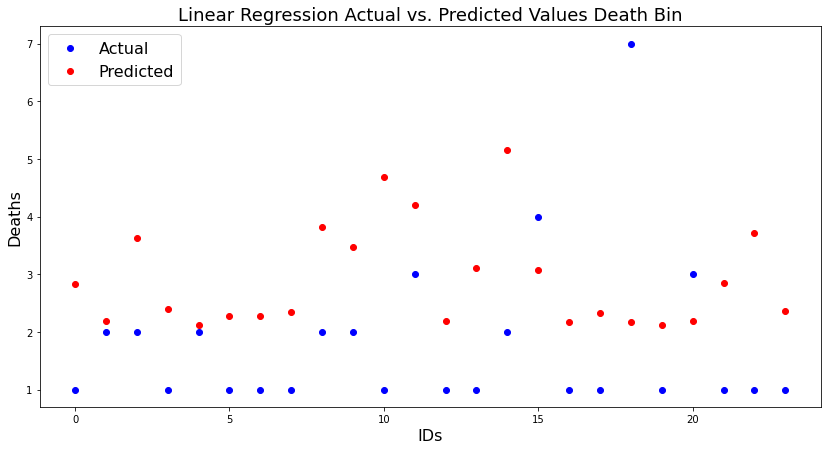

In [52]:
plt.figure(figsize=(14,7))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted')
plt.title('Linear Regression Actual vs. Predicted Values Death Bin', fontsize = 18)
plt.xlabel('IDs', fontsize = 16)
plt.ylabel('Deaths', fontsize = 16)
plt.legend(loc = 'upper left', fontsize = 16)
plt.ticklabel_format(style='plain', axis='x')
plt.show()

### Decision Tree Model

In [55]:
# using decision tree model
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

In [79]:
y_pred = dtr.predict(X_test)

In [80]:
df2 = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})

In [81]:
df2.head(25)

Real Values  Predicted Values
97          42.0             391.0
143        165.0             503.0
144        150.0             227.0
57           0.0             162.0
146        180.0              87.0
71           0.0              87.0
56           0.0             739.0
59          30.0               0.0
94         196.0               0.0
138        108.0              87.0
82          40.0            1882.0
99         272.0             261.0
51           0.0             503.0
109         50.0              97.0
168        139.0             158.0
123        352.0               0.0
79           0.0               0.0
92           0.0             162.0
160        762.0               0.0
125          0.0             517.0
112        229.0             105.0
108         71.0             102.0
65           0.0             183.0
73           0.0             455.0

In [82]:
X_test.shape

(24, 5)

In [83]:
y_test.shape

(24,)

In [84]:
y_pred.shape

(24,)

C:\Users\Tushar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Tushar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


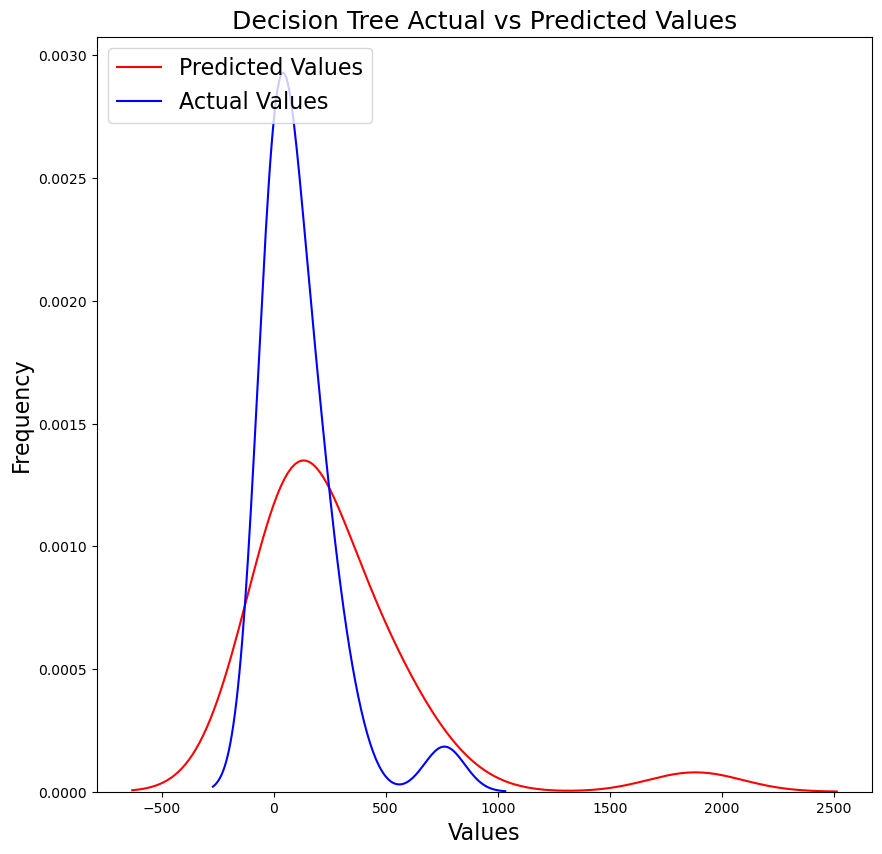

In [85]:
# Visualising the Decision Tree Regression Results 
plt.figure(figsize=(10,10))

sns.distplot(y_pred, hist = False, color = 'r', label = 'Predicted Values')
sns.distplot(y_test, hist = False, color = 'b', label = 'Actual Values')
plt.title('Decision Tree Actual vs Predicted Values', fontsize = 18)
plt.xlabel('Values', fontsize = 16)
plt.ylabel('Frequency', fontsize = 16)
plt.legend(loc = 'upper left', fontsize = 16)
plt.ticklabel_format(style='plain', axis='x')

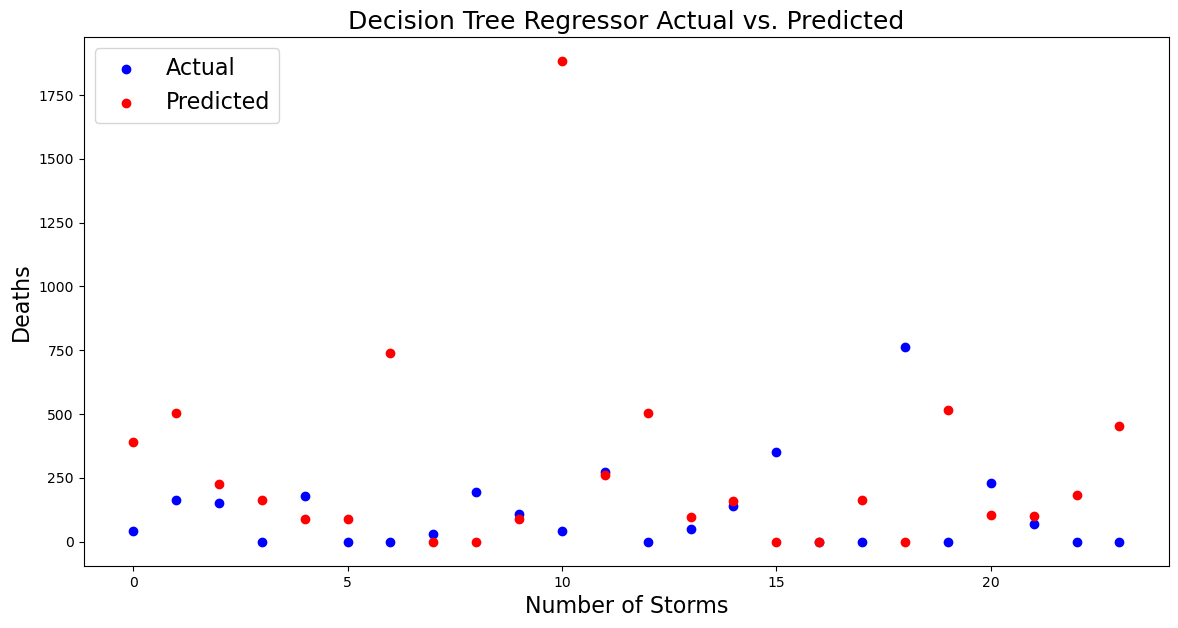

In [93]:
plt.figure(figsize=(14,7))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted')
plt.title('Decision Tree Regressor Actual vs. Predicted', fontsize = 18)
plt.xlabel('Number of Storms', fontsize = 16)
plt.ylabel('Deaths', fontsize = 16)
plt.legend(loc = 'upper left', fontsize = 16)
plt.ticklabel_format(style='plain', axis='x')
plt.show()

In [87]:
# calculate rmse and r2
#rmse = np.sqrt(mean_squared_error(y_test,y_pred))
#r2 = r2_score(y_test,y_pred)

corr_matrix = np.corrcoef(y_test, y_pred)
corr = corr_matrix[0,1]
R_sq = corr**2

In [88]:
R_sq

0.07097932327541905

In [89]:
# Calculation of Mean Squared Error (MSE)
mean_squared_error(y_test,y_pred)

240579.58333333334

In [90]:
# rmse metric
math.sqrt(mean_squared_error(y_test,y_pred))

490.4891266209001

In [91]:
# mae
mean_absolute_error(y_test,y_pred)

295.8333333333333

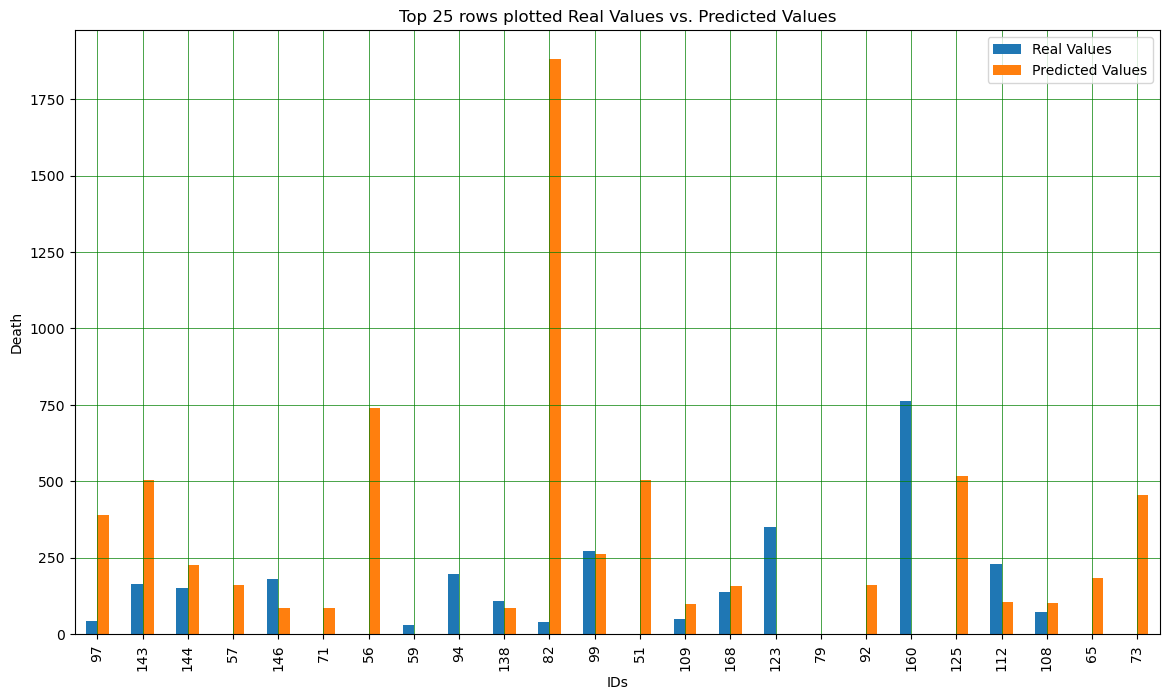

In [92]:
df = df2.head(25)
df.plot(kind='bar',figsize=(14,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title('Top 25 rows plotted Real Values vs. Predicted Values')
plt.xlabel('IDs')
plt.ylabel('Death')

plt.show()

### Decision Tree using death_bin

In [56]:
y_pred_death_bin = dtr.predict(X_test)

In [57]:
df_death_bin = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred_death_bin})

In [58]:
df_death_bin.head(25)

Real Values  Predicted Values
97             1               4.0
143            2               3.0
144            2               3.0
57             1               1.0
146            2               1.0
71             1               1.0
56             1               7.0
59             1               1.0
94             2               1.0
138            2               2.0
82             1               3.0
99             3               3.0
51             1               3.0
109            1               1.0
168            2               2.0
123            4               2.0
79             1               1.0
92             1               1.0
160            7               1.0
125            1               6.0
112            3               1.0
108            1               1.0
65             1               2.0
73             1               5.0

C:\Users\Tushar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Tushar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


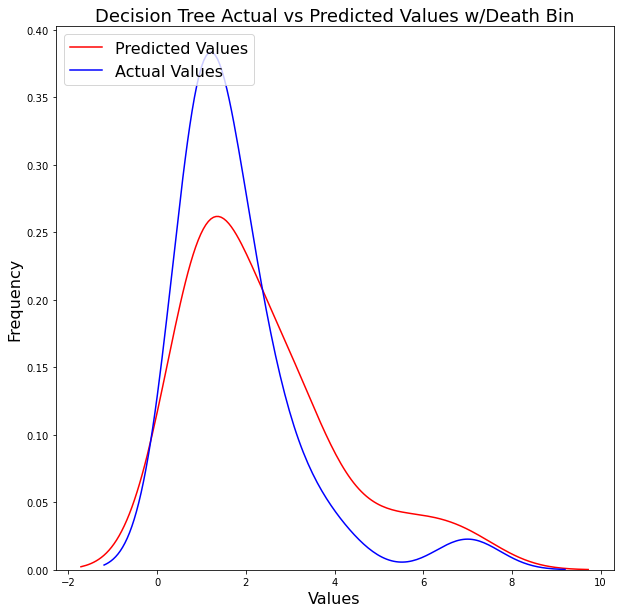

In [59]:
# Visualising the Decision Tree Regression Results 
plt.figure(figsize=(10,10))

sns.distplot(y_pred_death_bin, hist = False, color = 'r', label = 'Predicted Values')
sns.distplot(y_test, hist = False, color = 'b', label = 'Actual Values')
plt.title('Decision Tree Actual vs Predicted Values w/Death Bin', fontsize = 18)
plt.xlabel('Values', fontsize = 16)
plt.ylabel('Frequency', fontsize = 16)
plt.legend(loc = 'upper left', fontsize = 16)
plt.ticklabel_format(style='plain', axis='x')

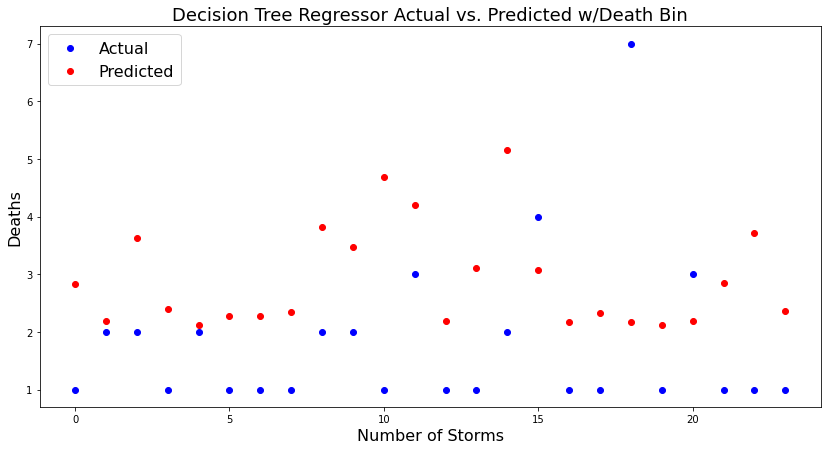

In [60]:
plt.figure(figsize=(14,7))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted')
plt.title('Decision Tree Regressor Actual vs. Predicted w/Death Bin', fontsize = 18)
plt.xlabel('Number of Storms', fontsize = 16)
plt.ylabel('Deaths', fontsize = 16)
plt.legend(loc = 'upper left', fontsize = 16)
plt.ticklabel_format(style='plain', axis='x')
plt.show()

In [61]:
# calculate rmse and r2
#rmse = np.sqrt(mean_squared_error(y_test,y_pred))
#r2 = r2_score(y_test,y_pred)

corr_matrix = np.corrcoef(y_test, y_pred)
corr = corr_matrix[0,1]
R_sq = corr**2

In [62]:
R_sq

4.10226712746072e-05

R_sq is 0.0000410226712746072

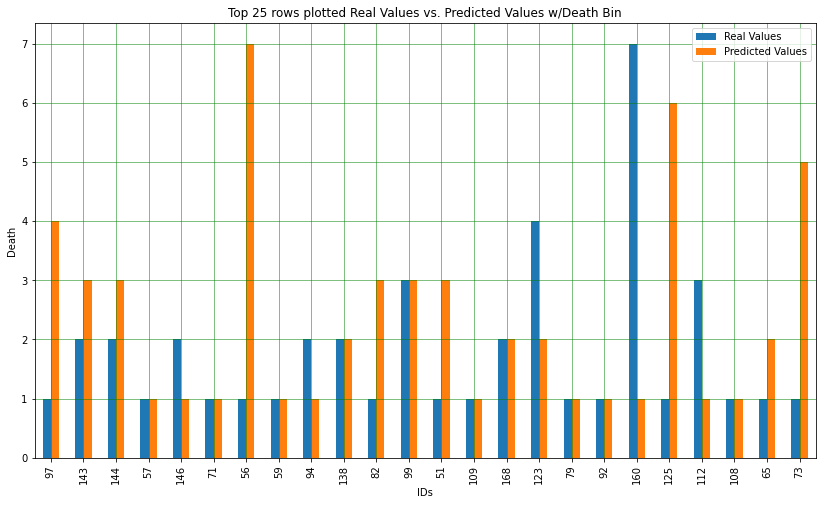

In [63]:
df = df_death_bin.head(25)
df.plot(kind='bar',figsize=(14,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title('Top 25 rows plotted Real Values vs. Predicted Values w/Death Bin')
plt.xlabel('IDs')
plt.ylabel('Death')

plt.show()

#### OSL with Death Bin

In [64]:
#add the column of ones to the inputs to calculate the intercept 
X = sm.add_constant(X)

In [65]:
#create regression model based on ordinary least squares
model = sm.OLS(y, X)

In [66]:
#variable results
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              death_bin   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     2.401
Date:                Thu, 30 Dec 2021   Prob (F-statistic):             0.0413
Time:                        21:54:23   Log-Likelihood:                -247.42
No. Observations:                 120   AIC:                             506.8
Df Residuals:                     114   BIC:                             523.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

C:\Users\Tushar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Tushar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


(0.0, 13.013805010457247)

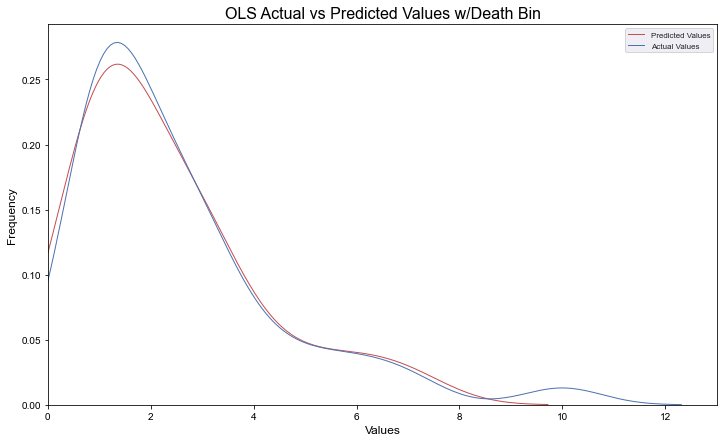

In [69]:
sns.distplot(y_pred_death_bin, hist = False, color = 'r', label = 'Predicted Values',  kde_kws=dict(linewidth=1))
sns.distplot(y, hist = False, color = 'b', label = 'Actual Values',  kde_kws=dict(linewidth=1))
sns.set(rc = {'figure.figsize':(15,15)})
plt.title('OLS Actual vs Predicted Values w/Death Bin', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper right', fontsize = 8)
plt.ticklabel_format(style='plain', axis='x')
plt.xlim(0)

## *****************************

#### Model with 1950 data including ecomonic damage

In [27]:
# Filter data down to US only
hurricanes_us_df_1950 = hurricanes_us_df[hurricanes_us_df['Year'] >= 1950]

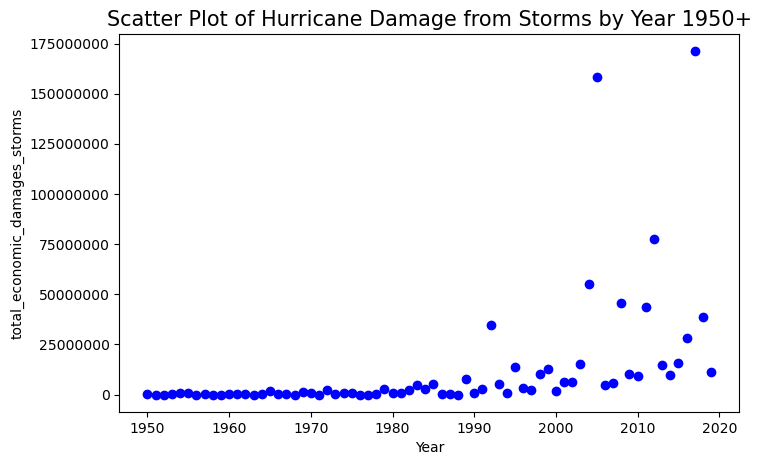

In [32]:
# For graph
y = hurricanes_us_df_1950['total_economic_damages_storms']
x = hurricanes_us_df_1950['Year']

# Plot
plt.scatter(x,y,color='blue')
plt.rcParams.update({'figure.figsize':(8,5), 'figure.dpi':100})

#Labels
plt.title('Scatter Plot of Hurricane Damage from Storms by Year 1950+',fontsize=15)
plt.ylabel('total_economic_damages_storms',fontsize=10)
plt.xlabel('Year',fontsize=10)
plt.ticklabel_format(axis='x', style='plain')
plt.ticklabel_format(axis='y', style='plain')
plt.show()

In [19]:
hurricanes_us_df_1950.columns

Index(['Entity', 'Year', 'no_us_hurricanes_HUDRAT_NOAA',
       'no_major_us_hurricanes_HUDRAT_ NOAA',
       'no_major_north_atlantic_hurricanes_HUDRAT_NOAA',
       'no_noth_atlantic_hurricanes_HUDRAT_NOAA',
       'accumulated_cyclone_energy_ACE_HUDRAT_NOAA',
       'cyclone_power_dissipation_index_PDI_HUDRAT_NOAA',
       'hurricane_fatality_rate', 'ACE', 'deaths_hurricanes_us',
       'total_economic_damages_storms'],
      dtype='object')

In [30]:
hurricanes_us_df_1950['no_us_hurricanes_HUDRAT_NOAA'] = hurricanes_us_df_1950['no_us_hurricanes_HUDRAT_NOAA'].astype(int)
hurricanes_us_df_1950['no_major_us_hurricanes_HUDRAT_ NOAA'] = hurricanes_us_df_1950['no_major_us_hurricanes_HUDRAT_ NOAA'].astype(int)
hurricanes_us_df_1950['no_major_north_atlantic_hurricanes_HUDRAT_NOAA'] = hurricanes_us_df_1950['no_major_north_atlantic_hurricanes_HUDRAT_NOAA'].astype(int)
hurricanes_us_df_1950['no_noth_atlantic_hurricanes_HUDRAT_NOAA'] = hurricanes_us_df_1950['no_noth_atlantic_hurricanes_HUDRAT_NOAA'].astype(int)
hurricanes_us_df_1950['accumulated_cyclone_energy_ACE_HUDRAT_NOAA'] = hurricanes_us_df_1950['accumulated_cyclone_energy_ACE_HUDRAT_NOAA'].astype(int)
hurricanes_us_df_1950['Year'] = hurricanes_us_df_1950['Year'].astype(int)
hurricanes_us_df_1950['cyclone_power_dissipation_index_PDI_HUDRAT_NOAA'] = hurricanes_us_df_1950['cyclone_power_dissipation_index_PDI_HUDRAT_NOAA']

<ipython-input-30-e6864baa302a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hurricanes_us_df_1950['no_us_hurricanes_HUDRAT_NOAA'] = hurricanes_us_df_1950['no_us_hurricanes_HUDRAT_NOAA'].astype(int)
<ipython-input-30-e6864baa302a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hurricanes_us_df_1950['no_major_us_hurricanes_HUDRAT_ NOAA'] = hurricanes_us_df_1950['no_major_us_hurricanes_HUDRAT_ NOAA'].astype(int)
<ipython-input-30-e6864baa302a>:3: SettingWithCopyWarning: 
A value is trying to be set on a

In [31]:
# split out X and y
X = hurricanes_us_df_1950[['no_us_hurricanes_HUDRAT_NOAA',
       'no_major_us_hurricanes_HUDRAT_ NOAA',
       'no_major_north_atlantic_hurricanes_HUDRAT_NOAA',
       'no_noth_atlantic_hurricanes_HUDRAT_NOAA',
       'accumulated_cyclone_energy_ACE_HUDRAT_NOAA',
                          'deaths_hurricanes_us']]

y = hurricanes_us_df_1950['total_economic_damages_storms']

In [32]:
# split the data in training and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [39]:
# using decision tree model
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

In [40]:
y_pred = dtr.predict(X_test)

In [41]:
df2 = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})

In [42]:
df2.head(25)

Real Values  Predicted Values
125          0.0           50000.0
126          0.0         4655000.0
147   10053450.0        15148400.0
121    2100000.0         5125000.0
129     910000.0         7880000.0
150    6328800.0         1865600.0
106     150000.0         1000000.0
158   10390000.0           50000.0
133    2545600.0         1610000.0
168   11325000.0        38875000.0
155    4727860.0         2560000.0
127     100000.0        15720000.0
130     861000.0         1865600.0
141   34500000.0         4655000.0

C:\Users\Tushar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Tushar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


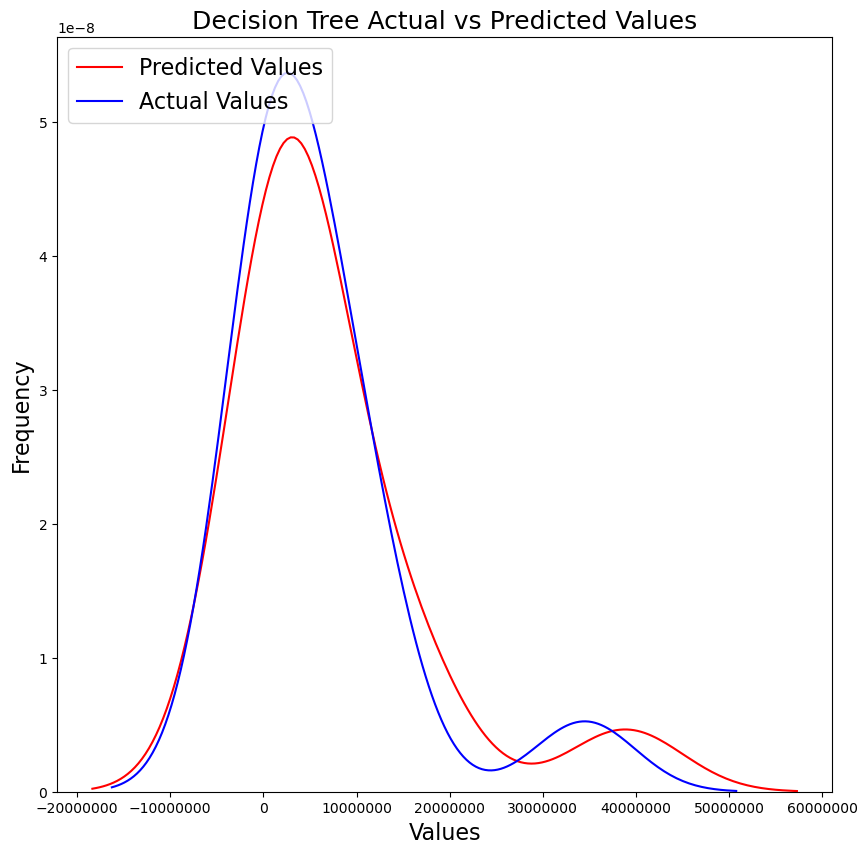

In [43]:
# Visualising the Decision Tree Regression Results 
plt.figure(figsize=(10,10))

sns.distplot(y_pred, hist = False, color = 'r', label = 'Predicted Values')
sns.distplot(y_test, hist = False, color = 'b', label = 'Actual Values')
plt.title('Decision Tree Actual vs Predicted Values', fontsize = 18)
plt.xlabel('Values', fontsize = 16)
plt.ylabel('Frequency', fontsize = 16)
plt.legend(loc = 'upper left', fontsize = 16)
plt.ticklabel_format(style='plain', axis='x')

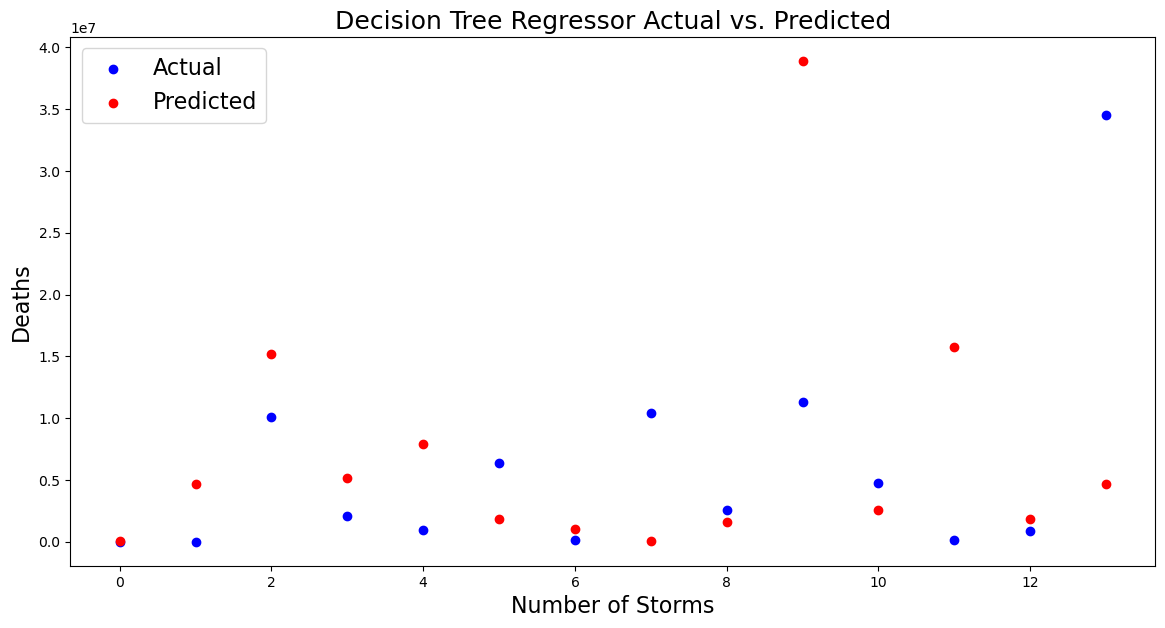

In [44]:
plt.figure(figsize=(14,7))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted')
plt.title('Decision Tree Regressor Actual vs. Predicted', fontsize = 18)
plt.xlabel('Number of Storms', fontsize = 16)
plt.ylabel('Deaths', fontsize = 16)
plt.legend(loc = 'upper left', fontsize = 16)
plt.ticklabel_format(style='plain', axis='x')
plt.show()

In [45]:
# calculate rmse and r2
#rmse = np.sqrt(mean_squared_error(y_test,y_pred))
#r2 = r2_score(y_test,y_pred)

corr_matrix = np.corrcoef(y_test, y_pred)
corr = corr_matrix[0,1]
R_sq = corr**2

In [46]:
R_sq

0.02501494202440917

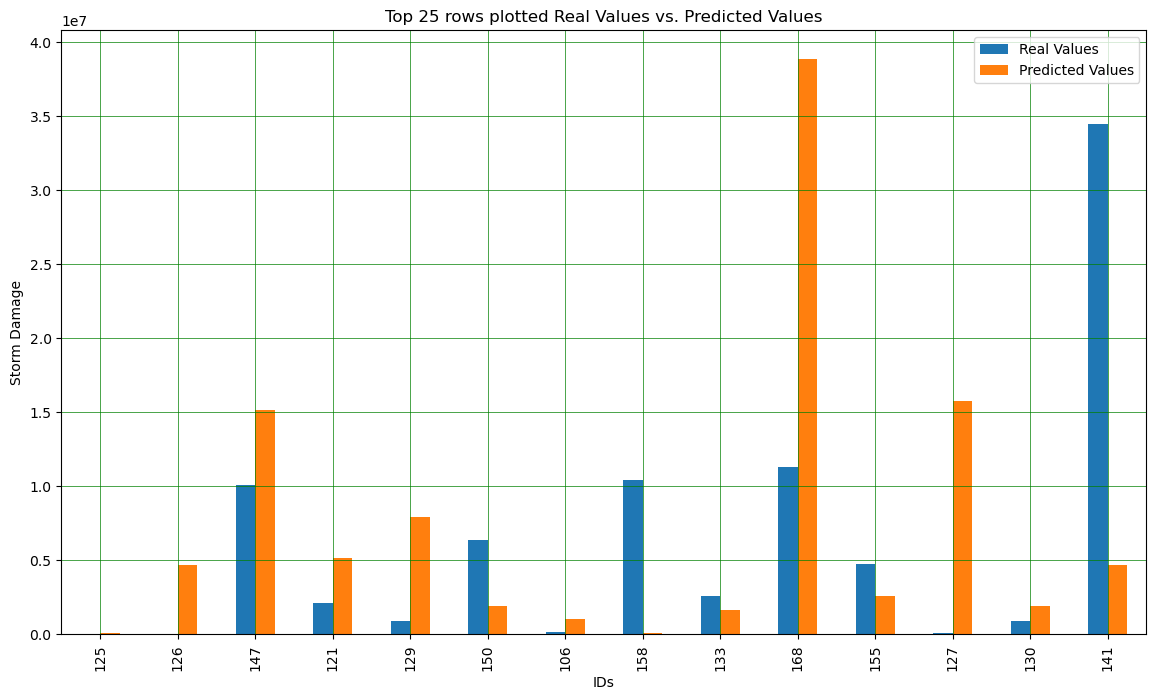

In [48]:
df = df2.head(25)
df.plot(kind='bar',figsize=(14,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title('Top 25 rows plotted Real Values vs. Predicted Values')
plt.xlabel('IDs')
plt.ylabel('Storm Damage')

plt.show()

#### OLS Model Ordinary Least Squares

In [12]:
hurricanes_us_df_1950.columns

Index(['Entity', 'Year', 'no_us_hurricanes_HUDRAT_NOAA',
       'no_major_us_hurricanes_HUDRAT_ NOAA',
       'no_major_north_atlantic_hurricanes_HUDRAT_NOAA',
       'no_noth_atlantic_hurricanes_HUDRAT_NOAA',
       'accumulated_cyclone_energy_ACE_HUDRAT_NOAA',
       'cyclone_power_dissipation_index_PDI_HUDRAT_NOAA',
       'hurricane_fatality_rate', 'ACE', 'deaths_hurricanes_us',
       'total_economic_damages_storms'],
      dtype='object')

In [33]:
X = hurricanes_us_df_1950[['no_us_hurricanes_HUDRAT_NOAA',
       'no_major_us_hurricanes_HUDRAT_ NOAA',
       'no_major_north_atlantic_hurricanes_HUDRAT_NOAA',
       'no_noth_atlantic_hurricanes_HUDRAT_NOAA',
       'accumulated_cyclone_energy_ACE_HUDRAT_NOAA',
                           'deaths_hurricanes_us']]

y = hurricanes_us_df_1950['total_economic_damages_storms']

In [34]:
hurricanes_us_df_1950

Entity  Year  no_us_hurricanes_HUDRAT_NOAA  \
99   North Atlantic  1950                             3   
100  North Atlantic  1951                             0   
101  North Atlantic  1952                             1   
102  North Atlantic  1953                             3   
103  North Atlantic  1954                             3   
..              ...   ...                           ...   
164  North Atlantic  2015                             0   
165  North Atlantic  2016                             2   
166  North Atlantic  2017                             3   
167  North Atlantic  2018                             8   
168  North Atlantic  2019                             6   

     no_major_us_hurricanes_HUDRAT_ NOAA  \
99                                     2   
100                                    0   
101                                    0   
102                                    0   
103                                    2   
..                                   ...   
164                                    0   
165                                    0   
166                                    2   
167                                    2   
168                                    3   

     no_major_north_atlantic_hurricanes_HUDRAT_NOAA  \
99                                                6   
100                                               3   
101                                               2   
102                                               3   
103                                               3   
..                                              ...   
164                                               2   
165                                               4   
166                                               6   
167                                               2   
168                                               2   

     no_noth_atlantic_hurricanes_HUDRAT_NOAA  \
99                                        11   
100                                        8   
101                                        5   
102                                        7   
103                                        7   
..                                       ...   
164                                        4   
165                                        7   
166                                       10   
167                                        8   
168                                        8   

     accumulated_cyclone_energy_ACE_HUDRAT_NOAA  \
99                                          211   
100                                         126   
101                                          69   
102                                          99   
103                                         111   
..                                          ...   
164                                          63   
165                                         141   
166                                         223   
167                                         132   
168                                         132   

     cyclone_power_dissipation_index_PDI_HUDRAT_NOAA  hurricane_fatality_rate  \
99                                            0.0000                 0.124777   
100                                           2.7846                 0.000000   
101                                           2.3445                 0.019041   
102                                           2.2639                 0.012486   
103                                           2.4730                 1.183861   
..                                               ...                      ...   
164                                              NaN                 0.043557   
165                                              NaN                      NaN   
166                                              NaN                      NaN   
167                                              NaN                      NaN   
168                              

In [35]:
#add the column of ones to the inputs to calculate the intercept 
X = sm.add_constant(X)

In [36]:
#create regression model based on ordinary least squares
model = sm.OLS(y, X)

In [37]:
#variable results
results = model.fit()

print(results.summary())

                                  OLS Regression Results                                 
Dep. Variable:     total_economic_damages_storms   R-squared:                       0.410
Model:                                       OLS   Adj. R-squared:                  0.354
Method:                            Least Squares   F-statistic:                     7.302
Date:                           Mon, 03 Jan 2022   Prob (F-statistic):           6.00e-06
Time:                                   22:14:19   Log-Likelihood:                -1285.6
No. Observations:                             70   AIC:                             2585.
Df Residuals:                                 63   BIC:                             2601.
Df Model:                                      6                                         
Covariance Type:                       nonrobust                                         
                                                     coef    std err          t      P>|t|      [0.0

In [39]:
ypred =  results.predict(X)
print('predicted response:',ypred, sep='\n')

predicted response:
99     3.939034e+07
100    1.852374e+06
101    5.229120e+06
102    1.874506e+07
103    2.242950e+07
           ...     
164    1.171444e+06
165    1.328883e+07
166    4.044656e+07
167    2.580538e+07
168    2.969652e+07
Length: 70, dtype: float64


C:\Users\Tushar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Tushar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


(0.0, 222070229.6450136)

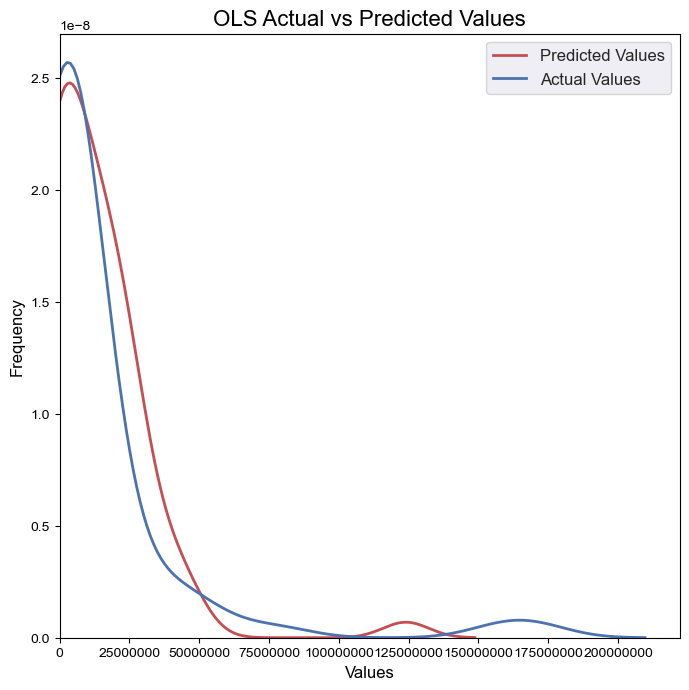

In [40]:
sns.distplot(ypred, hist = False, color = 'r', label = 'Predicted Values',  kde_kws=dict(linewidth=2))
sns.distplot(y, hist = False, color = 'b', label = 'Actual Values',  kde_kws=dict(linewidth=2))
sns.set(rc = {'figure.figsize':(15,15)})
plt.title('OLS Actual vs Predicted Values', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper right', fontsize = 12)
plt.ticklabel_format(style='plain', axis='x')
plt.xlim(0)

In [44]:
ols_df = pd.DataFrame({'Real Values':y, 'Predicted Values':ypred})

In [45]:
ols_df

Real Values  Predicted Values
99      100000.0      3.939034e+07
100          0.0      1.852374e+06
101          0.0      5.229120e+06
102      52000.0      1.874506e+07
103     731000.0      2.242950e+07
..           ...               ...
164   15720000.0      1.171444e+06
165   28050000.0      1.328883e+07
166  171110000.0      4.044656e+07
167   38875000.0      2.580538e+07
168   11325000.0      2.969652e+07

[70 rows x 2 columns]

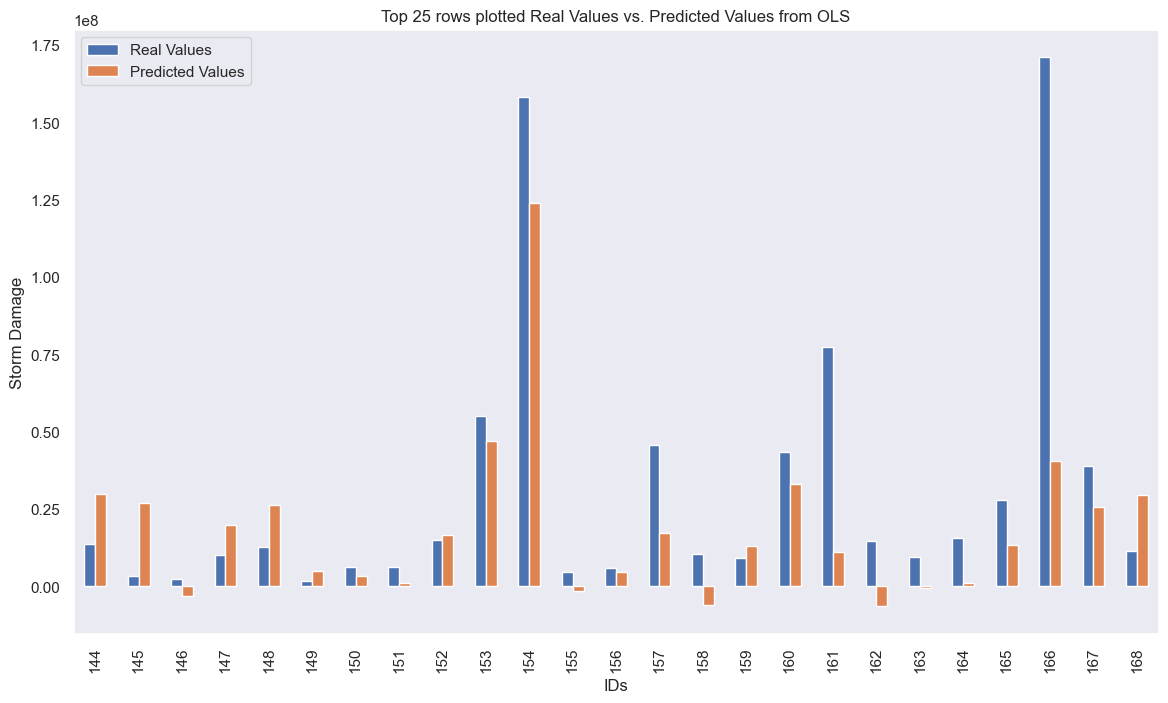

In [48]:
ols = ols_df.tail(25)
ols.plot(kind='bar',figsize=(14,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title('25 rows plotted Real Values vs. Predicted Values from OLS')
plt.xlabel('IDs')
plt.ylabel('Storm Damage')

plt.show()

#### Deaths by OLS

In [49]:
# split out X and y
X = hurricanes_us_df_1950[['no_us_hurricanes_HUDRAT_NOAA',
       'no_major_us_hurricanes_HUDRAT_ NOAA',
       'no_major_north_atlantic_hurricanes_HUDRAT_NOAA',
       'no_noth_atlantic_hurricanes_HUDRAT_NOAA',
       'accumulated_cyclone_energy_ACE_HUDRAT_NOAA']]

y = hurricanes_us_df_1950['deaths_hurricanes_us']

In [50]:
#add the column of ones to the inputs to calculate the intercept 
X = sm.add_constant(X)

In [51]:
#create regression model based on ordinary least squares
model = sm.OLS(y, X)

In [52]:
#variable results
results = model.fit()

print(results.summary())

                             OLS Regression Results                             
Dep. Variable:     deaths_hurricanes_us   R-squared:                       0.224
Model:                              OLS   Adj. R-squared:                  0.163
Method:                   Least Squares   F-statistic:                     3.695
Date:                  Mon, 03 Jan 2022   Prob (F-statistic):            0.00532
Time:                          22:30:56   Log-Likelihood:                -477.21
No. Observations:                    70   AIC:                             966.4
Df Residuals:                        64   BIC:                             979.9
Df Model:                             5                                         
Covariance Type:              nonrobust                                         
                                                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

In [53]:
ypred =  results.predict(X)
print('predicted response:',ypred, sep='\n')

predicted response:
99     476.919593
100    209.415030
101    156.265427
102    189.072613
103    393.404592
          ...    
164    144.809959
165    184.642379
166    442.722593
167    338.417981
168    459.589881
Length: 70, dtype: float64


C:\Users\Tushar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Tushar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


(0.0, 2332.700029085593)

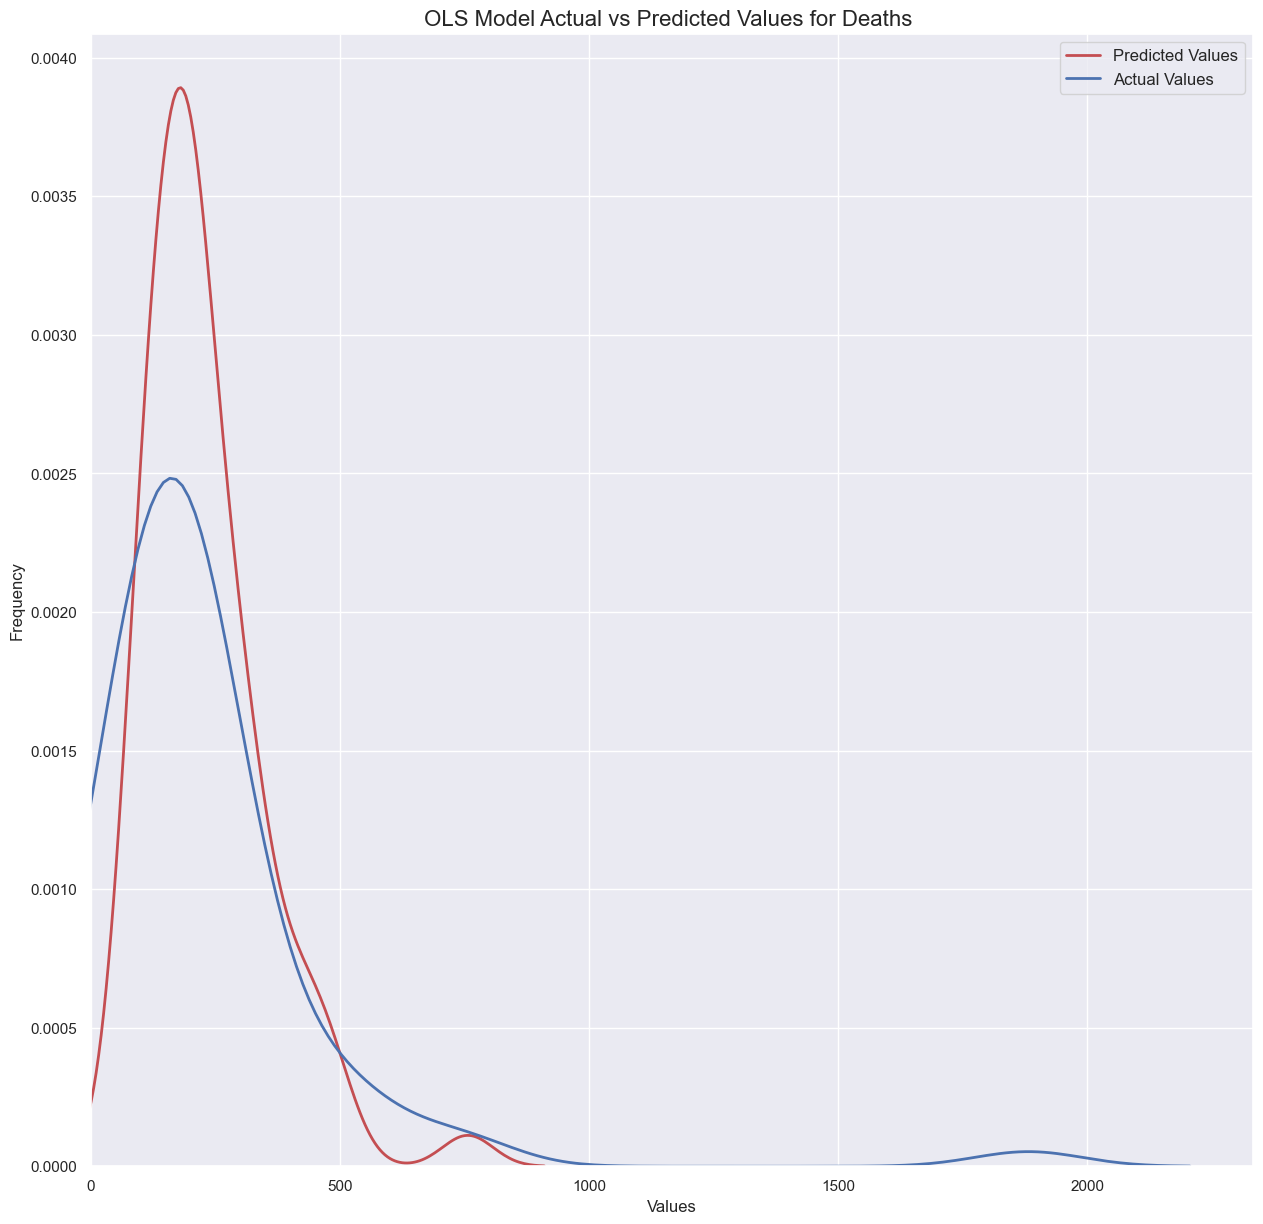

In [54]:
sns.distplot(ypred, hist = False, color = 'r', label = 'Predicted Values',  kde_kws=dict(linewidth=2))
sns.distplot(y, hist = False, color = 'b', label = 'Actual Values',  kde_kws=dict(linewidth=2))
sns.set(rc = {'figure.figsize':(15,15)})
plt.title('OLS Model Actual vs Predicted Values for Deaths ', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper right', fontsize = 12)
plt.ticklabel_format(style='plain', axis='x')
plt.xlim(0)